**Import needed libraries**

In [2]:
import pandas as pd
import seaborn as sns
import plotly_express as px
from datetime import datetime as dt

import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

This project will be centered around the Chicago Crime & selected Census data. Start of by downloading both datasets.

In [3]:
chicago_crime_2001_to_2023_df = pd.read_csv('chicago_crime.csv')
chicago_census_2008_to_2012_df = pd.read_csv('chicago_census.csv')

Since the data set is so big we will focus on a subset of the data.

**Important:** For the rest of this project, we will only work with data for the year 2008-2012.

---  
here we create a function that takes in dates as strings and converts them in to datetime objects

In [4]:
def convert_to_date(series:str):
    input_format = '%m/%d/%Y %I:%M:%S %p'
    output_date_format= dt.strptime(series,input_format)
    return output_date_format

In [5]:
chicago_crime_2001_to_2023_df['Date'] = chicago_crime_2001_to_2023_df['Date'].apply(convert_to_date)

---  


In [6]:

crime_chicago_2008_to_2012_df = chicago_crime_2001_to_2023_df[(chicago_crime_2001_to_2023_df['Year'] >=2008) & (chicago_crime_2001_to_2023_df['Year'] <=2012)].reset_index(drop=True)

**2.1** How many duplicated rows are there in crime data set? If there are any, remove them.

In [7]:
duplicate_sum = crime_chicago_2008_to_2012_df.duplicated().sum()

print(f'There are {duplicate_sum} duplicates in this dataframe')

there are 0 duplicates in this dataframe


**2.2** What columns in the crime dataset has missing values, and how many are they?

In [8]:
columns_with_NaN_series = crime_chicago_2008_to_2012_df.isnull().sum()

In [9]:
columns_with_NaN_filter = columns_with_NaN_series[columns_with_NaN_series >0] 

Location Description     1043
District                   40
Ward                       46
Community Area            854
X Coordinate            16232
Y Coordinate            16232
Latitude                16232
Longitude               16232
Location                16232
dtype: int64


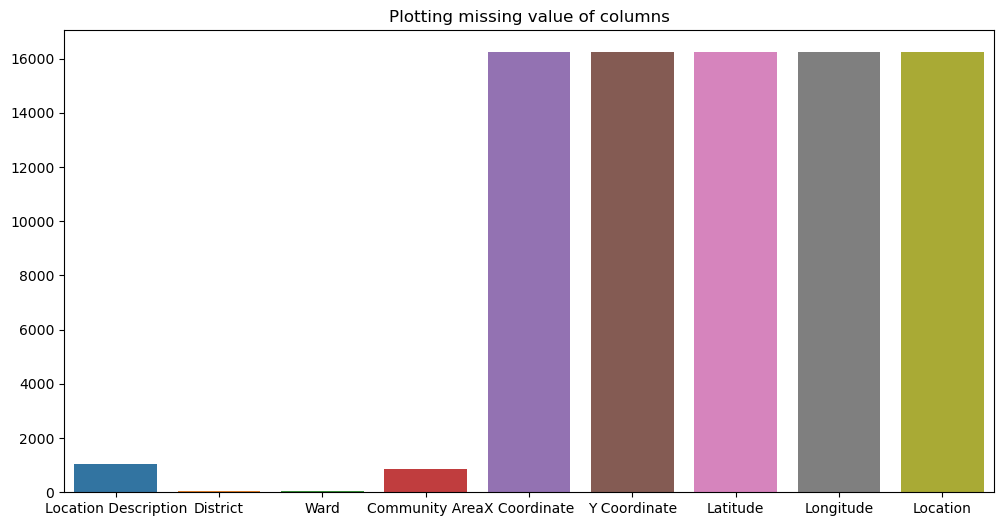

In [10]:
print(columns_with_NaN_filter)
def plot_columns_with_NaN(data_frame:pd.DataFrame):
    
    df_null_counts = data_frame.isnull().sum()
    df_null_counts = df_null_counts[df_null_counts > 0 ]  
    
    plt.figure(figsize=(12,6))
    sns.barplot(x= df_null_counts.index, y=df_null_counts.values, )

    plt.title("Plotting missing value of columns")
    plt.show()
plot_columns_with_NaN(crime_chicago_2008_to_2012_df)

Above you can see a series with all the columns with missing values and the amount of missing values right next to the column name and below that there us a barplot that visualize that data



---  

## 3 - The Birds Eye

**3.2** How many crimes records exists for the period 2008-2012, in total?

In [12]:
print(f'There are {len(crime_chicago_2008_to_2012_df)} documented crimerecords from the year 2008 to 2012 in Chicago')

There are 1878855 documented crimerecords from the year 2008 to 2012 in Chicago


**3.3** What's the number of recorded crimes for each of the years, individually? 

In [13]:
crimes_per_year = crime_chicago_2008_to_2012_df.groupby('Year').size()
crimes_per_year_df = crimes_per_year.reset_index(name='reported_crimes')
crimes_per_year_df

,Year,reported_crimes
0,2008,427185
1,2009,392828
2,2010,370518
3,2011,351997
4,2012,336327



Above one can see a data frame with the years under the year column and the amount of reported crimes in total for that year under the reported_crimes column.
2008 is the year with the most crimes and de reported crime rate decreases with each year.



---  

**3.4** Has the number of recorded crimes increased, decreased or remained stable throughout the years?

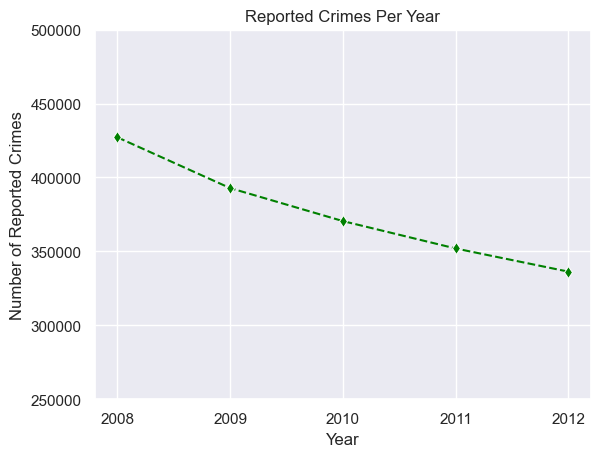

In [14]:
sns.set(style="darkgrid")

sns.lineplot(data=crimes_per_year_df, x='Year', y='reported_crimes',
             color='green',
             linestyle='--',
             marker='d') 

plt.title('Reported Crimes Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reported Crimes')
plt.ylim(25e4, 50e4)
plt.xticks(range(2008, 2013))


plt.grid(True)

plt.show()

by looking at the line plot above one can determin that the reported crime rate is decreesing with the years in chicago


---  

**3.5** By how many percentage points has the crime rate increased/decreased during the period? 

Hint: You only need to compare the number of crime records from 2008 with the number of crime records from 2012.

In [15]:
crimes_2008 = crimes_per_year_df.iloc[0]['reported_crimes']
crimes_2012 = crimes_per_year_df.iloc[4]['reported_crimes']

crime_difference_08_to_12 = crimes_2008-crimes_2012
crime_difference_precentage = round((crime_difference_08_to_12/crimes_2008 )* 100,2)
print(f'the reported crime rate has decreased by {crime_difference_precentage}% since 2008 to 2012')

the reported crime rate has decreased by 21.27% since 2008 to 2012


**3.6** Which primary crime types have increasing crime record numbers, and which ones have decreasing, when comparing 2008 to 2012?

In [16]:
filter_08 = crime_chicago_2008_to_2012_df['Year']==2008
filter_12 = crime_chicago_2008_to_2012_df['Year']==2012

In [17]:


types_of_crimes_08 = crime_chicago_2008_to_2012_df[filter_08].groupby('Primary Type').size() #skapar en serie av alla typer av brått samt antal gånger de har begåts
types_of_crimes_12 = crime_chicago_2008_to_2012_df[filter_12].groupby('Primary Type').size()

types_of_crimes_08_df = types_of_crimes_08.reset_index(name='Amount_of_times')
types_of_crimes_12_df = types_of_crimes_12.reset_index(name='Amount_of_times')

In [18]:
types_of_crimes_08_df = types_of_crimes_08_df.sort_values(by='Primary Type',ascending=False)

In [19]:
types_of_crimes_12_df = types_of_crimes_12_df.sort_values(by='Primary Type',ascending=False)

In [20]:
merged_08_12 = pd.merge(types_of_crimes_08_df,types_of_crimes_12_df,on='Primary Type', suffixes=['_08','_12'])

In [21]:
merged_08_12['difference'] =  (merged_08_12['Amount_of_times_12'].values)-(merged_08_12['Amount_of_times_08'].values)
merged_08_12['difference_(%)'] = round(((merged_08_12['difference'])/(merged_08_12['Amount_of_times_08']))*100,2)

In [22]:
merged_08_12.sort_values(by='difference',ascending=False, inplace=True)

In [23]:
merged_08_12.reset_index(drop=True).head()

,Primary Type,Amount_of_times_08,Amount_of_times_12,difference,difference_(%)
0,INTERFERENCE WITH PUBLIC OFFICER,580,1228,648,111.72
1,WEAPONS VIOLATION,3877,3907,30,0.77
2,CRIMINAL SEXUAL ASSAULT,48,67,19,39.58
3,STALKING,190,207,17,8.95
4,PUBLIC INDECENCY,4,17,13,325.00


---  


by looking at the df above you can see that INTERFERENCE WITH PUBLIC OFFICER is the crime that has increesed the most between 2008 and 2012.
by looking at the df below you can see that CRIMINAL DAMAGE	is the crime that has decreesed the most between 2008 and 2012


---  

In [24]:
merged_08_12.reset_index(drop=True).sort_values(by='difference').head()

,Primary Type,Amount_of_times_08,Amount_of_times_12,difference,difference_(%)
28,CRIMINAL DAMAGE,52843,35855,-16988,-32.15
27,BATTERY,75930,59134,-16796,-22.12
26,THEFT,88437,75465,-12972,-14.67
25,NARCOTICS,46506,35489,-11017,-23.69
24,OTHER OFFENSE,26532,17524,-9008,-33.95


In [25]:
types_of_crimes_08_df['year'] = 2008
types_of_crimes_12_df['year'] = 2012

In [26]:
types_of_crimes_08_12_df = pd.concat([types_of_crimes_08_df,types_of_crimes_12_df])

In [27]:
types_of_crimes_08_12_df.reset_index(drop=True,inplace=True)

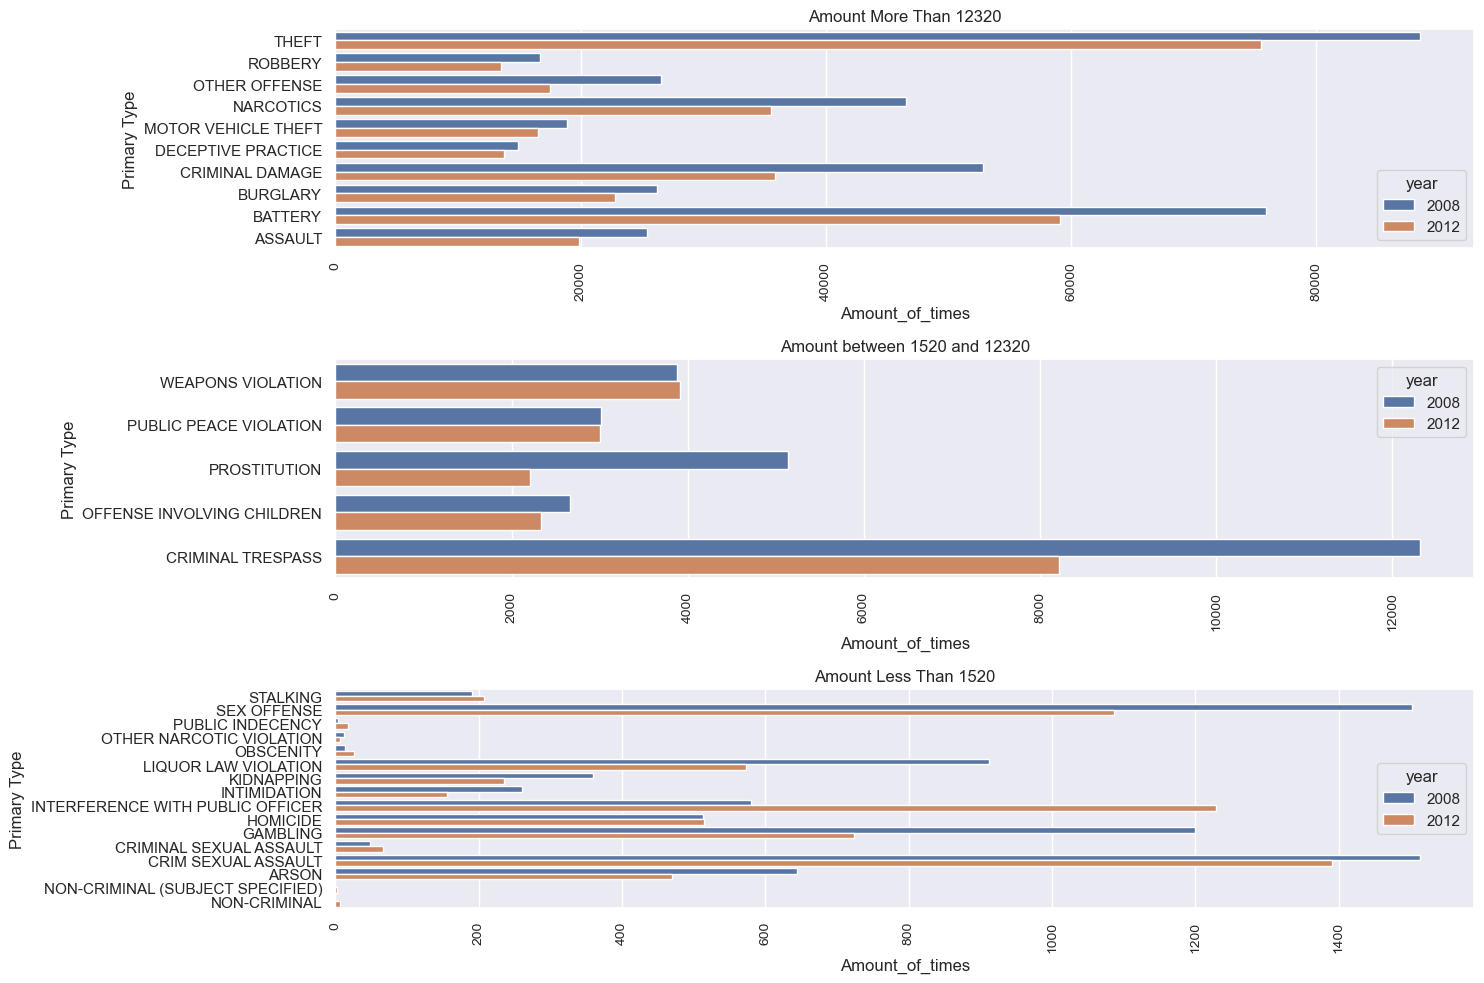

In [28]:
fig, axes = plt.subplots(3, 1, figsize=(15, 10))

sns.barplot(
    data=types_of_crimes_08_12_df[types_of_crimes_08_12_df['Amount_of_times'] > 12320],
    y='Primary Type',
    x='Amount_of_times',
    hue='year',
    ax=axes[0] 
)
axes[0].set_title('Amount More Than 12320')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].tick_params(axis='x', which='major', labelsize='small')

sns.barplot(
    data=types_of_crimes_08_12_df[(types_of_crimes_08_12_df['Amount_of_times'] > 1520) & (types_of_crimes_08_12_df['Amount_of_times'] < 12320)],
    y='Primary Type',
    x='Amount_of_times',
    hue='year',
    ax=axes[1]
)
axes[1].set_title('Amount between 1520 and 12320')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].tick_params(axis='x', which='major', labelsize='small')

sns.barplot(
    data=types_of_crimes_08_12_df[types_of_crimes_08_12_df['Amount_of_times'] < 1520],
    y='Primary Type',
    x='Amount_of_times',
    hue='year',
    ax=axes[2] 
)
axes[2].set_title('Amount Less Than 1520')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)
axes[2].tick_params(axis='x', which='major', labelsize='small')

plt.tight_layout()
plt.show()

the reason for make 3 subplots is that the diffrence in numbers are so great that the smaller values will not be visible of i where to plot all the values in one plot.
the reason for the specifik cutoffs for the plot values is so that a crime type for one year apears in one subplot and the other year in a different subolot. by these specifik cutoffs the plots apear complete  

---  


**3.7*** Which are the top 5 primary crime types in terms of increasing crime records between 2008 and 2012? Which are the top 5 primary crime types in terms of *percentual* increase? 

Are the top 5 lists you just produced different? If so, why?   

In [29]:
merged_08_12.sort_values(by='difference',ascending=False).head()

,Primary Type,Amount_of_times_08,Amount_of_times_12,difference,difference_(%)
17,INTERFERENCE WITH PUBLIC OFFICER,580,1228,648,111.72
0,WEAPONS VIOLATION,3877,3907,30,0.77
22,CRIMINAL SEXUAL ASSAULT,48,67,19,39.58
2,STALKING,190,207,17,8.95
6,PUBLIC INDECENCY,4,17,13,325.00


by looking at the df above you can se that INTERFERENCE WITH PUBLIC OFFICER	is the crime with the highest increas in reported crimes, this is shown under the difference column. PUBLIC INDECENCY is the crime with the highest precentual increase as shown on the df below under the column difference_(%). The reason for why the list are not the same is because the one above only looks att the increases amount as a hole while th edf below looks att the increas compaird to what it used to be.

In [30]:
merged_08_12.sort_values(by='difference_(%)',ascending=False).head()

,Primary Type,Amount_of_times_08,Amount_of_times_12,difference,difference_(%)
6,PUBLIC INDECENCY,4,17,13,325.00
17,INTERFERENCE WITH PUBLIC OFFICER,580,1228,648,111.72
11,OBSCENITY,13,26,13,100.00
22,CRIMINAL SEXUAL ASSAULT,48,67,19,39.58
2,STALKING,190,207,17,8.95


# 4 - Chicago Police Departement performance assessment

**4.1** How many recorded crimes have in total led to an arrest? What's the corresponding arrest percentage?

In [31]:
succesfull_arrests = crime_chicago_2008_to_2012_df['Arrest'] == True
amount_of_arrests = len(crime_chicago_2008_to_2012_df[succesfull_arrests])


print(f'there have been {amount_of_arrests} of arrests of all sorts in the period from 2008 to 2012')

there have been 508367 of arrests of all sorts in the period from 2008 to 2012


In [32]:
arrest_percentage = round((amount_of_arrests/len(crime_chicago_2008_to_2012_df))*100,2)

print(f'The arrest rate per reported crimes in chicago durring 2008-2012 is {arrest_percentage}%')

The arrest rate per reported crimes in chicago durring 2008-2012 is 27.06%


**4.2** Has the arrest rate percentage been increasing, decreasing or remained stable over these years?

In [33]:
arrests_per_year = crime_chicago_2008_to_2012_df[succesfull_arrests].groupby('Year').size()

arrests_per_year_df = arrests_per_year.reset_index(name='Amount_of_arrests')

In [34]:
arrests_per_year_df['(%)_arrests'] = round((arrests_per_year_df['Amount_of_arrests']/crimes_per_year_df['reported_crimes'])*100,2)

other than a few precentages point the arrest rate has not changed that mcuh over the years 2008 to 2012, the biggest increes was from 2008 to 2009, and the biggest decrease in arrest rate was in the years between 2011-2012, this is shown under the (%)_arrests column where the number under the column represent the arrestrate for that year in precentages

In [35]:
arrests_per_year_df

,Year,Amount_of_arrests,(%)_arrests
0,2008,110021,25.75
1,2009,110829,28.21
2,2010,100549,27.14
3,2011,96293,27.36
4,2012,90675,26.96


**4.3** For the Year 2011, which month has the highest arrest percentage?

In [36]:
filter_11 = crime_chicago_2008_to_2012_df['Year'] == 2011
crimes_11 = crime_chicago_2008_to_2012_df[filter_11]

arrests_11_df = crimes_11[succesfull_arrests]

arrests_per_month_11_filt = pd.DatetimeIndex(arrests_11_df['Date']).month.value_counts()
crimes_per_month_11_filt = pd.DatetimeIndex(crimes_11['Date']).month.value_counts()



In [37]:
arrests_per_month_11_df=arrests_per_month_11_filt.reset_index(name='Amount_of_arrests')
crimes_per_month_11_df=crimes_per_month_11_filt.reset_index(name='Amount_of_crimes')

In [38]:
crimes_arrests_per_month_11_df = pd.merge(arrests_per_month_11_df,crimes_per_month_11_df,on='Date')

In [39]:
crimes_arrests_per_month_11_df['arrests_per_crime(%)'] = round((crimes_arrests_per_month_11_df['Amount_of_arrests']/crimes_arrests_per_month_11_df['Amount_of_crimes'])*100,2)

In [40]:
def num_to_month(key:int)->str:
    if key == 1:
        key = 'January'
    elif key == 2:
        key = 'February'
    elif key == 3:
        key = 'March'
    elif key == 4:
        key = 'April'
    elif key == 5:
        key = 'May'
    elif key == 6:
        key = 'June'
    elif key == 7:
        key = 'July'
    elif key == 8:
        key = 'August'
    elif key == 9:
        key = 'September'
    elif key == 10:
        key = 'October'
    elif key == 11:
        key = 'November'
    elif key == 12:
        key = 'December'
    return key

In [41]:
crimes_arrests_per_month_11_df['Date'] = crimes_arrests_per_month_11_df['Date'].apply(num_to_month)

In [42]:
crimes_arrests_per_month_11_df.rename(columns={'Date':'Month'},inplace=True)

In [43]:
crimes_arrests_per_month_11_df.sort_values(by='arrests_per_crime(%)',ascending=False,inplace=True)

---  
By looking at the dataframe you can see that March is the month where there was the highest precentage of arrests per reported crime. this is shown under the column arrests_rate(%) where the numbers represent the precenage of crimes thar resulted in arrests.

The numbers for each month do not differ to much especially in the first 3 months of the year where the diffrence is less than 0.5 precent.

In [44]:
crimes_arrests_per_month_11_df.reset_index(drop=True)

,Month,Amount_of_arrests,Amount_of_crimes,arrests_per_crime(%)
0,March,8411,28702,29.30
1,February,6496,22239,29.21
2,January,7861,27228,28.87
3,August,9042,32602,27.73
4,September,8287,29946,27.67
5,April,7910,29116,27.17
6,December,7288,27031,26.96
7,November,7448,27661,26.93
8,July,8861,33264,26.64
9,June,8565,32322,26.50


**4.4** For the same year, and the particular month of you've identified in question 2.3, which primary crime type has the highest number of arrests?

In [45]:
march_11_filter = pd.DatetimeIndex(crimes_11['Date']).month == 3

crimes_in_march = crimes_11[march_11_filter]

arrests_in_march = crimes_in_march[succesfull_arrests]
arrests_per_crime = arrests_in_march.groupby('Primary Type').size()

In [46]:
arrests_per_crime_df = arrests_per_crime.reset_index(name='Amount_of_arrests')

In [47]:
arrests_per_crime_df.sort_values(by='Amount_of_arrests', ascending=False).reset_index(drop=True).head(1)

,Primary Type,Amount_of_arrests
0,NARCOTICS,3747


NARCOTICS is the crime with the highest number of arrests in march of 2011

**5.1** How many recorded crimes are domestic?

In [48]:
domestic_crimes_filter = crime_chicago_2008_to_2012_df['Domestic'] == True

domestic_crimes = len(crime_chicago_2008_to_2012_df[domestic_crimes_filter])

print(f'There has been {domestic_crimes} in chicago between 2008 to 2012')


There has been 309749 in chicago between 2008 to 2012


**5.2** How many recorded crimes, of the primary type *offense involving children*, are domestic?

In [49]:
crime_inv_children_filter = crime_chicago_2008_to_2012_df['Primary Type'] == 'OFFENSE INVOLVING CHILDREN'

domestic_crimes_inv_children = crime_chicago_2008_to_2012_df[crime_inv_children_filter & domestic_crimes_filter]

amount_of_domestic_crimes_inv_children = len(domestic_crimes_inv_children)

print(f'There has been {amount_of_domestic_crimes_inv_children} domestic crimes involvning children in chicago between 2008 to 2012')

There has been 10921 domestic crimes involvning children in chicago between 2008 to 2012


**5.3** How much more likely is it that an offense involving children is domestic?

In [50]:
crimes_inv_children_df = crime_chicago_2008_to_2012_df[crime_inv_children_filter]

amount_all_crimes_inv_children = len(crimes_inv_children_df)

procent_of_crimes_inv_children_domestic = round((amount_of_domestic_crimes_inv_children/amount_all_crimes_inv_children)*100,2)

liklyhood_domestic = round(procent_of_crimes_inv_children_domestic/(100-procent_of_crimes_inv_children_domestic),1)

print(f' Out of all crimes invlovling children, {procent_of_crimes_inv_children_domestic}% are domestic.\n',
      f'This would sugest that it is {liklyhood_domestic} times more likly for a crime involving children being domestic.')

 Out of all crimes invlovling children, 86.09% are domestic.
 This would sugest that it is 6.2 times more likly for a crime involving children being domestic.


**5.4** What's the worst weekday in terms of number of domestic offenses involving children? How does it compare to the other weekdays?

In [51]:
def from_num_to_day(key:int)->str:
    if key == 6:
        key = 'Sunday'
    elif key == 0:
        key = 'Monday'
    elif key == 1:
        key = 'Tuesday'
    elif key == 2:
        key = 'Wednesday'
    elif key == 3:
        key = 'Thursday'
    elif key == 4:
        key = 'Friday'
    elif key == 5:
        key = 'Saturday'
    return key

In [52]:
domestic_abuse_inv_children_per_weekday = pd.DatetimeIndex(domestic_crimes_inv_children['Date']).weekday.value_counts()

domestic_abuse_inv_children_per_weekday_df = domestic_abuse_inv_children_per_weekday.reset_index(name= 'domestic_crimes_inv_children')

domestic_abuse_inv_children_per_weekday_df.rename(columns={'Date':'Day_of_the_week'},inplace=True)
domestic_abuse_inv_children_per_weekday_df.sort_values(by='Day_of_the_week',inplace=True)

domestic_abuse_inv_children_per_weekday_df['Day_of_the_week'] = domestic_abuse_inv_children_per_weekday_df['Day_of_the_week'].apply(from_num_to_day)

In [53]:
domestic_abuse_inv_children_per_weekday_df.sort_values(by='domestic_crimes_inv_children',ascending=False)

,Day_of_the_week,domestic_crimes_inv_children
0,Friday,2023
1,Saturday,1716
2,Sunday,1684
3,Thursday,1433
4,Tuesday,1388
5,Wednesday,1372
6,Monday,1305


In the data fram above the weekdays are sorted after the days where the are most number of domestic offenses involving children and the domestic_crimes_inv_children column represents the amount of reported domestic offenses involving children.
 
Friday seems to be the day of the week where there is the most number of domestic offenses involving children (2023) followed by the rest of the weekend. The differnece bewteen weekends and weekdays not including friday is very drastic as shown bellow

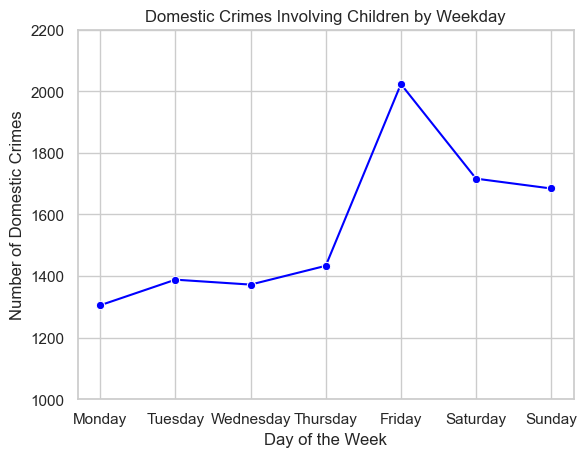

In [54]:
min_value, max_value = 1000,2200
sns.set(style="whitegrid")

sns.lineplot(data=domestic_abuse_inv_children_per_weekday_df,
             x='Day_of_the_week',
             y='domestic_crimes_inv_children',
             color='blue',
             linestyle='-', 
             marker='o')  

plt.title('Domestic Crimes Involving Children by Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Domestic Crimes')
plt.ylim(min_value, max_value)
plt.grid(True)

plt.show()

**5.5** What's the distribution, in terms of recorded crimes, for domestic offenses involving children, of sexual character? What's the arrest percentage for each?

In [55]:
dom_filt= crimes_inv_children_df['Domestic'] == True
sexual_filt = crimes_inv_children_df['Description'].str.contains('SEXUAL|SEX', case=False, na=False)
sexual_crimes_agains_children_df = crimes_inv_children_df[sexual_filt]

domestic_sexual_crimes_inv_children = dom_filt & sexual_filt

domestic_sexual_crimes_inv_children_df = crimes_inv_children_df[domestic_sexual_crimes_inv_children]


In [56]:
types_of_crimes_inv_children_df = crimes_inv_children_df[dom_filt & sexual_filt] 

In [57]:
types_of_crimes_inv_children_series = types_of_crimes_inv_children_df.groupby('Description').size()
types_of_crimes_inv_children_amount_df = types_of_crimes_inv_children_series.reset_index(name='times_reported')


In [58]:
arrests_domestic_sexual = succesfull_arrests & dom_filt & sexual_filt
arrests_domestic_sexual_df = crimes_inv_children_df[arrests_domestic_sexual]

In [59]:
arrests_domestic_sexual_series = arrests_domestic_sexual_df.groupby('Description').size()

arrests_domestic_sexual_amount_df = arrests_domestic_sexual_series.reset_index(name='arrests')

In [60]:
mereged_crimes_inv_children = pd.merge(types_of_crimes_inv_children_amount_df,arrests_domestic_sexual_amount_df, on='Description')
mereged_crimes_inv_children['arrest_rate'] = round((mereged_crimes_inv_children['arrests']/mereged_crimes_inv_children['times_reported'])*100,2) 
mereged_crimes_inv_children = mereged_crimes_inv_children.sort_values(by='arrest_rate',ascending=False).reset_index(drop=True)
mereged_crimes_inv_children

,Description,times_reported,arrests,arrest_rate
0,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,143,49,34.27
1,AGG SEX ASSLT OF CHILD FAM MBR,507,142,28.01
2,SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER,47,11,23.40
3,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,114,26,22.81
4,AGG CRIM SEX ABUSE FAM MEMBER,670,151,22.54
5,SEX ASSLT OF CHILD BY FAM MBR,295,63,21.36
6,CRIM SEX ABUSE BY FAM MEMBER,463,65,14.04
7,CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,23,3,13.04


above i have created a df where i have sorted the diffrent types of sexual crimes agains children in order of highest arrest rate, this is represented under the column arrest_rate and the numbers are in precentages.

AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER is sexual crime involving children with the higest arrest rate (34.27%)


---  

**5.6*** What period of the day does the specific kind of (domestic) offense against children, with the most recorded arrests, tend do occur? 

How does it look for all weekdays individually?
        Can you find certain periods of the week that are especially bad? 

In [61]:

domestic_crimes_inv_children_arrested = domestic_crimes_inv_children[succesfull_arrests] 
domestic_crimes_inv_children_type = domestic_crimes_inv_children_arrested.groupby('Description').size()

domestic_crimes_inv_children_type_df = domestic_crimes_inv_children_type.reset_index(name='arrests')

As you can see bellow, AGG CRIM SEX ABUSE FAM MEMBER is the kind of crime that occures the most where the crime has led to an arrest

In [62]:
arrests_domestic_sexual_amount_df.sort_values(by='arrests',ascending=False).head(1)

,Description,arrests
0,AGG CRIM SEX ABUSE FAM MEMBER,151


In [63]:
domestic_crimes_inv_children_arrested_most_occuring_type = domestic_crimes_inv_children_arrested['Description'] == 'AGG CRIM SEX ABUSE FAM MEMBER'

In [64]:
domestic_crimes_inv_children_arrested_most_occuring_type_df = domestic_crimes_inv_children_arrested[domestic_crimes_inv_children_arrested_most_occuring_type]

In [65]:
domestic_crimes_inv_children_arrested_most_occuring_type_time_serie = pd.DatetimeIndex(domestic_crimes_inv_children_arrested_most_occuring_type_df['Date']).hour.value_counts()

domestic_crimes_inv_children_arrested_most_occuring_type_time_df = domestic_crimes_inv_children_arrested_most_occuring_type_time_serie.reset_index(name='reported offences')

In [66]:
domestic_crimes_inv_children_arrested_most_occuring_type_time_df.rename(columns={'Date': 'Hour of the day'},inplace=True)

In [67]:
domestic_crimes_inv_children_arrested_most_occuring_type_time_df.sort_values(by='Hour of the day',inplace=True)

---  


Assuming that most of the crimes documeted to have taken place at 00 are inputs where there was no specific hour and so the arrest report got recorded as 00.00 as defult.

with that assumption you can see in the barplot below that AGG CRIM SEX ABUSE FAM MEMBER arrests occure more frequently in the late afternoon and early mornings

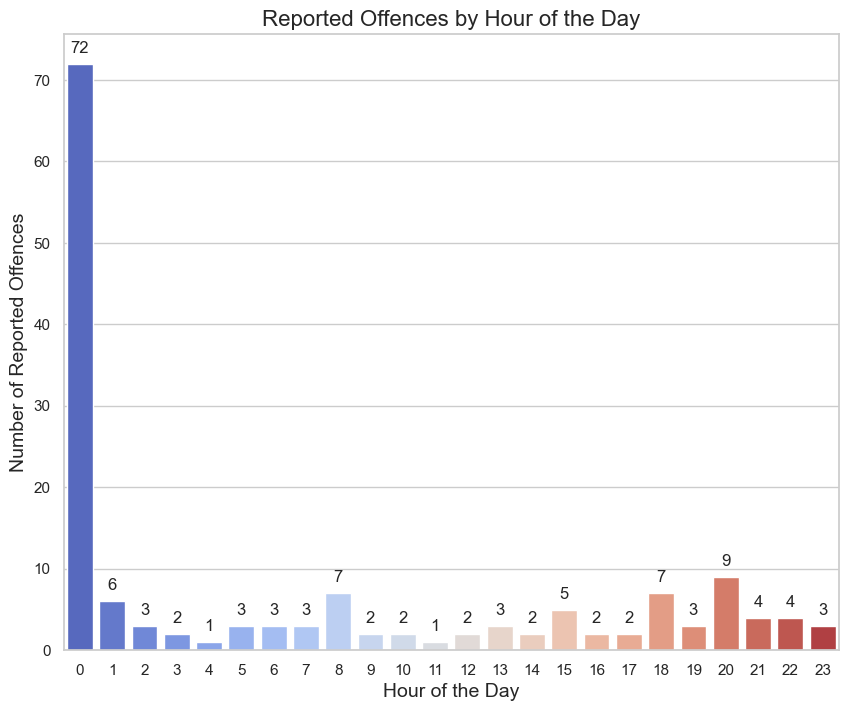

In [68]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 8))
barplot = sns.barplot(data=domestic_crimes_inv_children_arrested_most_occuring_type_time_df, x='Hour of the day', y='reported offences', palette='coolwarm')

plt.title('Reported Offences by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Reported Offences', fontsize=14)

for p in barplot.patches:
    height = p.get_height()
    barplot.text(p.get_x() + p.get_width() / 2., height + 1, int(height), ha='center', va='bottom', fontsize=12)

plt.show()

**5.7*** Looking at any given year as a whole, what's the worst period in terms of domestic number of offenses involving children? Can you find any trends? Does the trend seem to be consistent for every other year? 

In [69]:
domestic_crimes_inv_children_08 = domestic_crimes_inv_children[domestic_crimes_inv_children['Year']==2008]
domestic_crimes_inv_children_09 = domestic_crimes_inv_children[domestic_crimes_inv_children['Year']==2009]
domestic_crimes_inv_children_10 = domestic_crimes_inv_children[domestic_crimes_inv_children['Year']==2010]
domestic_crimes_inv_children_11 = domestic_crimes_inv_children[domestic_crimes_inv_children['Year']==2011]
domestic_crimes_inv_children_12 = domestic_crimes_inv_children[domestic_crimes_inv_children['Year']==2012]

In [70]:
domestic_crimes_inv_children_08['Quarter'] = pd.DatetimeIndex(domestic_crimes_inv_children_08['Date']).quarter
domestic_crimes_inv_children_09['Quarter'] = pd.DatetimeIndex(domestic_crimes_inv_children_09['Date']).quarter
domestic_crimes_inv_children_10['Quarter'] = pd.DatetimeIndex(domestic_crimes_inv_children_10['Date']).quarter
domestic_crimes_inv_children_11['Quarter'] = pd.DatetimeIndex(domestic_crimes_inv_children_11['Date']).quarter
domestic_crimes_inv_children_12['Quarter'] = pd.DatetimeIndex(domestic_crimes_inv_children_12['Date']).quarter

In [71]:
def crimes_per_quarter(input_df:pd.DataFrame)->pd.DataFrame:
    amount_of_reports_per_q = {}
    for i in range(0,4):
        filt = input_df['Quarter'] == i+1
        crimes_count = len(input_df[filt])

        amount_of_reports_per_q[f'q{(i+1)}'] =crimes_count
        df = pd.DataFrame(list(amount_of_reports_per_q.items()), columns=['Quarter', 'Reported crimes'])
    
    return df

In [72]:
y08=crimes_per_quarter(domestic_crimes_inv_children_08)
y09=crimes_per_quarter(domestic_crimes_inv_children_09)
y10=crimes_per_quarter(domestic_crimes_inv_children_10)
y11=crimes_per_quarter(domestic_crimes_inv_children_11)
y12=crimes_per_quarter(domestic_crimes_inv_children_12)



In [73]:
y8_y9 = pd.merge(y08,y09,on='Quarter',suffixes=['_y08','_y09'])
y8_y9_y10 = pd.merge(y8_y9,y10,on='Quarter')
y8_y9_y10_y11 = pd.merge(y8_y9_y10,y11,on='Quarter',suffixes=['_y10','_y11'])
merged_08_to_12_quarter_reports = pd.merge(y8_y9_y10_y11,y12,on='Quarter')
merged_08_to_12_quarter_reports.rename(columns={'reported crimes':'reported crimes_12'},inplace=True)

In [74]:
merged_08_to_12_quarter_reports

,Quarter,Reported crimes_y08,Reported crimes_y09,Reported crimes_y10,Reported crimes_y11,Reported crimes
0,q1,574,637,658,529,540
1,q2,543,591,598,571,473
2,q3,575,532,580,495,501
3,q4,547,516,525,494,442


looking at the plots below you can see that the first quarter of the year is typicly the period where there are the most reported domestic crimes invloving children but this is not consistant in 2011. although the last quarter of the year is not always the quarter with the least reported domestic crimes invloving children, it is often lesser than other quarters. Reported domestic crimes invloving children seems to deecres thru the quarters for the mostpart

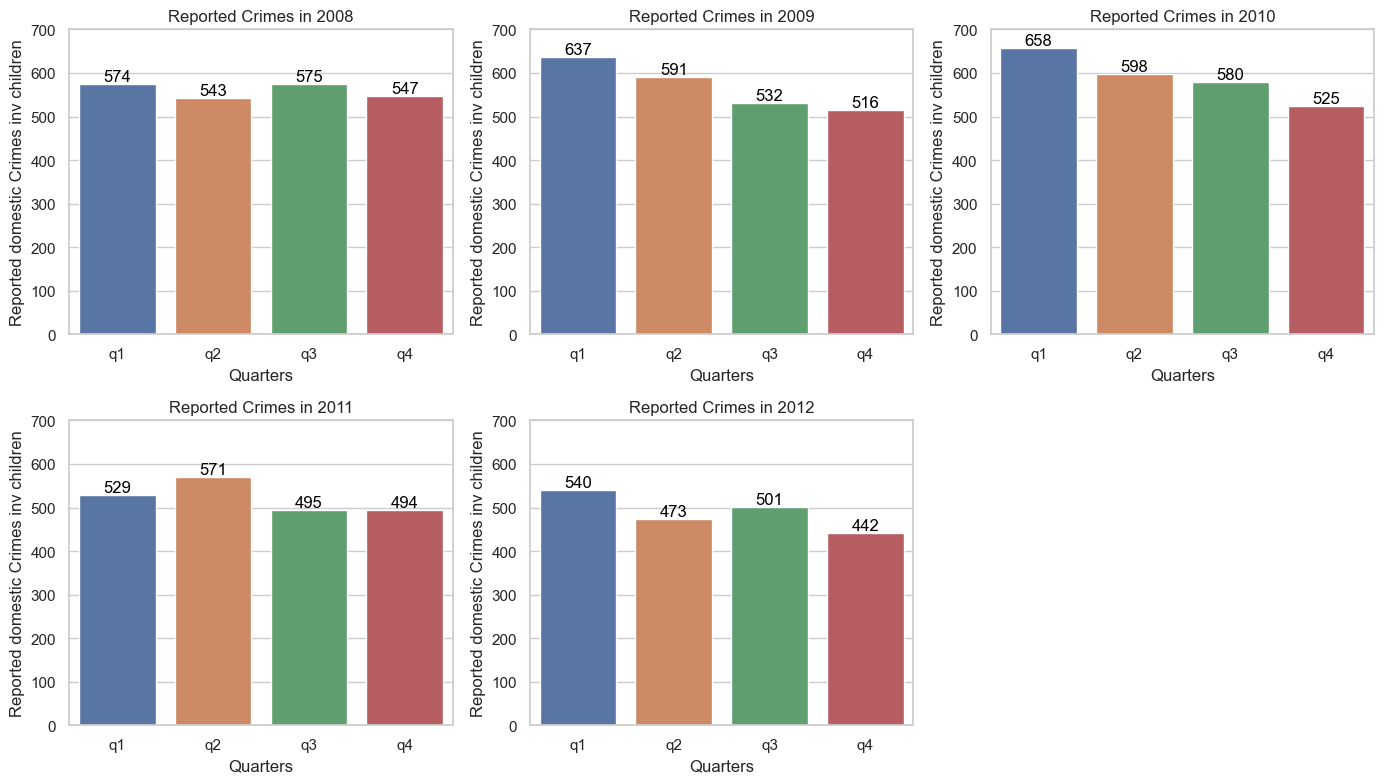

In [75]:
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()

dfs = [y08, y09, y10, y11, y12]
titles = ['2008', '2009', '2010', '2011', '2012']

for i, df in enumerate(dfs):
    ax = sns.barplot(data=df, x=df.columns[0], y=df.columns[1], ax=axes[i])
    axes[i].set_title(f"Reported Crimes in {titles[i]}")
    axes[i].set_xlabel('Quarters')
    axes[i].set_ylabel('Reported domestic Crimes inv children')
    axes[i].set_ylim(0, 700, 50)

    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()),
                fontsize=12, color='black', ha='center', va='bottom')

axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

**6.1** In general, what weekday is a crime most likely to occur? Which day is the safest?

In [76]:
crimes_per_weekday_num = pd.DatetimeIndex(crime_chicago_2008_to_2012_df['Date']).weekday
crimes_per_weekday_num_series = crimes_per_weekday_num.value_counts()

In [77]:
crimes_per_weekday_df = crimes_per_weekday_num_series.reset_index(name='crimes_reported') 
crimes_per_weekday_df.rename(columns={'Date':'Day_of_the_week'},inplace=True)
crimes_per_weekday_df['Day_of_the_week']=crimes_per_weekday_df['Day_of_the_week'].apply(from_num_to_day)

In the df below the weekdays are sorted by the days where there are the most reported crimes. The crimes_reported column represents the amount of reported crimes for theat weekday in numbers/amount
as shown below, friday is the day where there is the most reported crimes and sunday is tha day where the leas amount of crimes gets reported....presumably because its the lords day :)

In [78]:
crimes_per_weekday_df

,Day_of_the_week,crimes_reported
0,Friday,284094
1,Wednesday,273621
2,Tuesday,271286
3,Thursday,269160
4,Saturday,266318
5,Monday,263008
6,Sunday,251368


**6.2** Which is the most unsafe weekday for you if you'd like to avoid the following:

a) getting your phone stolen by sneaky pickpockets (THEFT) 

b) having your handbag forcibly pulled away (ROBBERY) 

c) getting jumped in an alley (ASSAULT)

For each of the above crimes, also answer at what locations you should be extra careful around.

In [79]:
def area_num_to_name(val:int)->str:
    for num, name in zip(chicago_census_2008_to_2012_df['Community Area Number'],chicago_census_2008_to_2012_df['COMMUNITY AREA NAME']):
        if val == num:
            val = name
            return val 

In [80]:
theft_filt = crime_chicago_2008_to_2012_df['Primary Type'] == 'THEFT'

theft_df = crime_chicago_2008_to_2012_df[theft_filt]

weekday_theft = pd.DatetimeIndex(theft_df['Date']).weekday

weekday_theft_series = weekday_theft.value_counts()

weekday_theft_df = weekday_theft_series.reset_index(name='robberies_reported') 
weekday_theft_df.rename(columns={'Date':'Day_of_the_week'},inplace=True)
weekday_theft_df['Day_of_the_week']=weekday_theft_df['Day_of_the_week'].apply(from_num_to_day)

weekday_theft_df

,Day_of_the_week,robberies_reported
0,Friday,61649
1,Tuesday,57864
2,Wednesday,57727
3,Thursday,56837
4,Monday,56694
5,Saturday,56559
6,Sunday,49458


In the df above the weekdays are sorted by the days where there are the most reported thefts. The Reported_thefts column represents the amount of reported crimes for theat weekday in numbers/amount.

Fridays seems to be the weekday where there ar the moste reported crimes and below you can se that Near North Side is the community area with the most reported thefts (26399 reports).

In [81]:
theft_per_area = theft_df.groupby('Community Area').size()
theft_per_area_df = theft_per_area.reset_index(name='Reported_thefts').sort_values(by='Reported_thefts',ascending=False)
theft_per_area_df['Community Area'] = theft_per_area_df['Community Area'].apply(area_num_to_name)
theft_per_area_df.head(1).reset_index(drop=True)

,Community Area,Reported_thefts
0,Near North Side,26399


In [82]:
robbery_filt = crime_chicago_2008_to_2012_df['Primary Type'] == 'ROBBERY'

robbery_df = crime_chicago_2008_to_2012_df[robbery_filt]

weekday_robbery = pd.DatetimeIndex(robbery_df['Date']).weekday

weekday_robbery_series = weekday_robbery.value_counts()

weekday_robbery_df = weekday_robbery_series.reset_index(name='robberies_reported') 
weekday_robbery_df.rename(columns={'Date':'Day_of_the_week'},inplace=True)
weekday_robbery_df['Day_of_the_week']=weekday_robbery_df['Day_of_the_week'].apply(from_num_to_day)

weekday_robbery_df

,Day_of_the_week,robberies_reported
0,Friday,10975
1,Monday,10781
2,Wednesday,10632
3,Saturday,10622
4,Sunday,10564
5,Tuesday,10548
6,Thursday,10305


In the df above the weekdays are sorted by the days where there are the most reported robberies. The Reported_robbery column represents the amount of reported crimes for theat weekday in numbers/amount

Again you se friday in the number one spot for reports, this time for robbery reports. The diffrence between the weekdays are very slim, unlike the theft reports from above.
Austin is the community area with the most reported robberys with quite some margin (5686  reported robberys)

In [83]:
robbery_per_area = robbery_df.groupby('Community Area').size()
robbery_per_area_df = robbery_per_area.reset_index(name='Reported_robbery').sort_values(by='Reported_robbery',ascending=False)
robbery_per_area_df['Community Area'] = robbery_per_area_df['Community Area'].apply(area_num_to_name)
robbery_per_area_df.head().reset_index(drop=True)

,Community Area,Reported_robbery
0,Austin,5686
1,South Shore,3038
2,Chicago Lawn,2753
3,Greater Grand Crossing,2740
4,Auburn Gresham,2691


In [84]:
assault_filt = crime_chicago_2008_to_2012_df['Primary Type'] == 'ASSAULT'

assault_df = crime_chicago_2008_to_2012_df[assault_filt]

weekday_assault = pd.DatetimeIndex(assault_df['Date']).weekday

weekday_assault_series = weekday_assault.value_counts()

weekday_assault_df = weekday_assault_series.reset_index(name='Assults_reported') 
weekday_assault_df.rename(columns={'Date':'Day_of_the_week'},inplace=True)
weekday_assault_df['Day_of_the_week']=weekday_assault_df['Day_of_the_week'].apply(from_num_to_day)

weekday_assault_df

,Day_of_the_week,Assults_reported
0,Wednesday,16969
1,Tuesday,16348
2,Thursday,16164
3,Friday,15972
4,Monday,15742
5,Saturday,14521
6,Sunday,14441


In the df above the weekdays are sorted by the days where there are the most reported assults. The Reported_assults column represents the amount of reported assults for theat weekday in numbers/amount

When it comest to reported assults, wednesday is the day where thera are the most reported assults but not by alot more then other weekdays. There is a signifigant drop in reported assults durring weekends.
Again, Austin is the community area with the most reported assults with a large margin (6809 reported assults)

In [85]:
assults_per_area = assault_df.groupby('Community Area').size()
assults_per_area_df = assults_per_area.reset_index(name='Reported_assults').sort_values(by='Reported_assults',ascending=False)
assults_per_area_df['Community Area'] = assults_per_area_df['Community Area'].apply(area_num_to_name)
assults_per_area_df.head().reset_index(drop=True)

,Community Area,Reported_assults
0,Austin,6809
1,South Shore,4081
2,West Englewood,3786
3,Roseland,3762
4,Englewood,3723


**6.3** Which are the worst 10 dates (most recorded crimes) of 2008? Does this trend hold for the other years?

In [86]:
df_08 = crime_chicago_2008_to_2012_df[filter_08]
dates_08 = df_08.groupby(pd.DatetimeIndex(df_08['Date']).date).size()
dates_08_df = dates_08.reset_index(name='crimes')

dates_08_df.rename(columns={'index':'Date'},inplace=True)
dates_08_df.sort_values(by='crimes',ascending=False).reset_index(drop=True).head(10)

,Date,crimes
0,2008-01-01,1827
1,2008-08-01,1531
2,2008-11-01,1479
3,2008-09-01,1469
4,2008-10-10,1453
5,2008-05-01,1450
6,2008-10-31,1444
7,2008-08-22,1440
8,2008-06-01,1438
9,2008-08-15,1436


In the df above you have a list of the top 10 word days in terms of reported crimes in 2008 sorted by order of largest amount of reports


---  

In [87]:
dates_08_12 = crime_chicago_2008_to_2012_df.groupby(pd.DatetimeIndex(crime_chicago_2008_to_2012_df['Date']).date).size()
dates_df = dates_08_12.reset_index(name='crimes')

dates_df.rename(columns={'index':'Date'},inplace=True)

In [88]:
dates_df.sort_values(by='crimes',ascending=False).head(10).reset_index(drop=True)

,Date,crimes
0,2009-01-01,1842
1,2008-01-01,1827
2,2011-01-01,1565
3,2012-01-01,1546
4,2008-08-01,1531
5,2008-11-01,1479
6,2008-09-01,1469
7,2010-01-01,1467
8,2008-10-10,1453
9,2008-05-01,1450


In the df above you have a list of the top 10 word days in terms of reported crimes for all years between 2008 to 2012 sorted by order of largest amount of reports


---  

**6.4** From the perspective of total number of crime records, which are the Top 10 primary crime types? Which are the Bottom 10? 

Consider this question for the years 2008-2012 as a whole. 

In [89]:
crime_type_size = crime_chicago_2008_to_2012_df.groupby('Primary Type').size()

crime_type_size_df = crime_type_size.reset_index(name='times_reported')

top_ten_reported_crimes_df = crime_type_size_df.sort_values(by='times_reported',ascending=False).head(10).reset_index(drop=True)

top_ten_reported_crimes_df

,Primary Type,times_reported
0,THEFT,396788
1,BATTERY,329384
2,CRIMINAL DAMAGE,214408
3,NARCOTICS,207540
4,BURGLARY,128872
5,OTHER OFFENSE,111875
6,ASSAULT,110157
7,MOTOR VEHICLE THEFT,89272
8,ROBBERY,74427
9,DECEPTIVE PRACTICE,67885


Above you can see a df with the crimes with the top 10 most reports in the years between 2008-2012 sorted in order from most to least out of the top 10. Theft is the crime with the most reports.

Below is a piechart of displaying the proportion of each crime relativ to the top ten most reported crimes:

In [90]:
px.pie(top_ten_reported_crimes_df,
       values= 'times_reported',
       names = 'Primary Type' )

In [91]:
bottom_ten_reported_crimes_df = crime_type_size_df.sort_values(by='times_reported').head(10).reset_index(drop=True)
bottom_ten_reported_crimes_df

,Primary Type,times_reported
0,HUMAN TRAFFICKING,1
1,NON-CRIMINAL (SUBJECT SPECIFIED),2
2,NON-CRIMINAL,8
3,OTHER NARCOTIC VIOLATION,36
4,PUBLIC INDECENCY,51
5,OBSCENITY,134
6,CRIMINAL SEXUAL ASSAULT,267
7,STALKING,935
8,INTIMIDATION,1017
9,KIDNAPPING,1467


Above you can see a df with the crimes with the top 10 least reports in the years between 2008-2012 sorted in order from least to most out of the top 10. HUMAN TRAFFICKING	 is the crime with the least reports.

Below is a piechart of displaying the proportion of each crime relativ to the top ten most reported crimes:

In [92]:
px.pie(bottom_ten_reported_crimes_df,
       values= 'times_reported',
       names = 'Primary Type' )

i could have displayed both piechart in one subplot but i felt that having them next to eachother could prove missleading since the propotions for kidnapping, for example, takes much more of the bottom ten pie chart than the BATTERY takes up in the top ten piechart even though there are more than 20 times more battery reports than kidnappings.

**6.5** For all those crime categories you identified in 6.4, how does their distribution instead look per year - rather than the full 2008-2012 period as a whole?

piechart subplolt

In [93]:
def top_crimes_per_year(year:int,crime_type:str=None,bottom_10:bool=False)->pd.DataFrame: 
    if crime_type != None:
        year_filt = (crime_chicago_2008_to_2012_df['Year'] == year) & (crime_chicago_2008_to_2012_df['Primary Type'] == crime_type)
    else:
        year_filt = crime_chicago_2008_to_2012_df['Year'] == year

    year_df = crime_chicago_2008_to_2012_df[year_filt]
    crime_type_size = year_df.groupby('Primary Type').size()

    crime_type_size_df = crime_type_size.reset_index(name='times_reported')

    top_ten_reported_crimes_df = crime_type_size_df.sort_values(by='times_reported',ascending=False).head(10).reset_index(drop=True)
    if bottom_10:
        top_ten_reported_crimes_df = crime_type_size_df.sort_values(by='times_reported').head(10).reset_index(drop=True)

    return top_ten_reported_crimes_df

In [94]:
top_crimes_08 = top_crimes_per_year(2008)
top_crimes_09 = top_crimes_per_year(2009)
top_crimes_10 = top_crimes_per_year(2010)
top_crimes_11 = top_crimes_per_year(2011)
top_crimes_12 = top_crimes_per_year(2012)

In [95]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

dfs = [top_crimes_08, top_crimes_09, top_crimes_10, top_crimes_11, top_crimes_12]

fig = make_subplots(rows=3, cols=2, specs=[[{'type': 'pie'}, {'type': 'pie'}],
                                            [{'type': 'pie'}, {'type': 'pie'}],
                                            [{'type': 'pie'}, None]])

titles = ['2008', '2009', '2010', '2011', '2012']

for i, df in enumerate(dfs):
    fig.add_trace(go.Pie(labels=df['Primary Type'], values=df['times_reported'], name=titles[i]),
                  row=(i // 2) + 1, col=(i % 2) + 1)

for i, title in enumerate(titles):
    fig.update_traces(title_text=title, title_position='top center', row=(i // 2) + 1, col=(i % 2) + 1)

fig.update_layout(height=900, width=800, title_text="Pie Charts Subplot")
fig.show()

Above i have created i subplot with the crimes with the most reports for each year. Theft seams to consistantly be teh most reported crime over the years 2008-2012 followed by battery reports.


---  

In [96]:
bottom_crimes_08 = top_crimes_per_year(2008,bottom_10=True)
bottom_crimes_09 = top_crimes_per_year(2009,bottom_10=True)
bottom_crimes_10 = top_crimes_per_year(2010,bottom_10=True)
bottom_crimes_11 = top_crimes_per_year(2011,bottom_10=True)
bottom_crimes_12 = top_crimes_per_year(2012,bottom_10=True)

In [97]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

dfs = [bottom_crimes_08, bottom_crimes_09, bottom_crimes_10, bottom_crimes_11, bottom_crimes_12]

fig = make_subplots(rows=3, cols=2, specs=[[{'type': 'pie'}, {'type': 'pie'}],
                                            [{'type': 'pie'}, {'type': 'pie'}],
                                            [{'type': 'pie'}, None]])

titles = ['2008', '2009', '2010', '2011', '2012']

for i, df in enumerate(dfs):
    fig.add_trace(go.Pie(labels=df['Primary Type'], values=df['times_reported'], name=titles[i]),
                  row=(i // 2) + 1, col=(i % 2) + 1)

for i, title in enumerate(titles):
    fig.update_traces(title_text=title, title_position='top center', row=(i // 2) + 1, col=(i % 2) + 1)

fig.update_layout(height=900, width=800, title_text="Pie Charts Subplot")
fig.show()

Above i have createad a subpiechart with 5 piecharts each representing a year between 2008-2012, each piechart represent the crimes with the least amount of reports.


---  

**6.6*** Which primary crime types does the city of Chicago seem to get better at preventing? For which ones is it the opposite, i.e, the situation is getting worse? 

---  


In the following df views there will be five columns per view, the first column represnt the crime type, the second column represent amoun of reports for that crime in 2008 and the third column represents the same as the second but for 2012. The fourht and fifth column represent the differcnce betwee the two years where the former represents the diffrens in numbers and the later represent the diffrence in precentage. 

---  


In terms of number of cases(represented by the fourht column, "difference"), criminal damage has deecresed the most, with 16988 less cases, between 2008 and 2012

In [98]:
merged_08_12.sort_values(by='difference').head(1)

,Primary Type,Amount_of_times_08,Amount_of_times_12,difference,difference_(%)
23,CRIMINAL DAMAGE,52843,35855,-16988,-32.15


---  


In termes of precentages(column "difference_(%)") it is prostitution that chicago has battled the best with a 57.13% decreese from 2008-2012

In [99]:
merged_08_12.sort_values(by='difference_(%)').head(1)

,Primary Type,Amount_of_times_08,Amount_of_times_12,difference,difference_(%)
7,PROSTITUTION,5141,2204,-2937,-57.13


---  


The INTERFERENCE WITH PUBLIC OFFICER in chicago has increesed the most of all types of crimes in terms of amount of crimes

In [100]:
merged_08_12.sort_values(by='difference',ascending=False).head(1)

,Primary Type,Amount_of_times_08,Amount_of_times_12,difference,difference_(%)
17,INTERFERENCE WITH PUBLIC OFFICER,580,1228,648,111.72


---  


Public indecency is the crime that has increesed the most in terms of precentages in chicago between 2008 and 2012, albeit the difference in number terms is not that much.... but thats how precentages works :/

In [101]:
merged_08_12.sort_values(by='difference_(%)',ascending=False).head(1)

,Primary Type,Amount_of_times_08,Amount_of_times_12,difference,difference_(%)
6,PUBLIC INDECENCY,4,17,13,325.0


**7.1** Are there more or less crimes reported during daytime, compared with nighttime? Daytime is considered as all hours between 06:00-18:00, nighttime is the rest of the day.

In [102]:
def day_n_night_df_maker(year:int=None,type_of_crime:str=None,with_difference:bool=False)->pd.DataFrame:
    
    if year != None:
        year_filt = crime_chicago_2008_to_2012_df['Year'] == year
        if type_of_crime != None:
            crime_filt = crime_chicago_2008_to_2012_df['Primary Type'] == type_of_crime
            year_df = crime_chicago_2008_to_2012_df[year_filt & crime_filt]
        else:
            year_df = crime_chicago_2008_to_2012_df[year_filt]   
    else:
        if type_of_crime != None:
            crime_filt = crime_chicago_2008_to_2012_df['Primary Type'] == type_of_crime
            year_df = crime_chicago_2008_to_2012_df[crime_filt]
        else:
            year_df = crime_chicago_2008_to_2012_df

    daytime_filt = (pd.DatetimeIndex(year_df['Date']).hour >= 6) & (pd.DatetimeIndex(year_df['Date']).hour <= 18)

    dt_df = year_df[daytime_filt]
    dt_weekdays = pd.DatetimeIndex(dt_df['Date']).weekday

    dt_weekday_series = dt_weekdays.value_counts()
    dt_weekday_df = dt_weekday_series.reset_index(name=f'reported_crimes_{year}')
    dt_weekday_df.rename(columns={'Date':'Weekday'},inplace=True)


    nighttime_filt = (pd.DatetimeIndex(year_df['Date']).hour >= 19) | (pd.DatetimeIndex(year_df['Date']).hour <= 5)

    nt_df = year_df[nighttime_filt]
    nt_weekdays = pd.DatetimeIndex(nt_df['Date']).weekday

    nt_weekday_series = nt_weekdays.value_counts()
    nt_weekday_df = nt_weekday_series.reset_index(name=f'reported_crimes_{year}')
    nt_weekday_df.rename(columns={'Date':'Weekday'},inplace=True)
  
    weekday_crime_rate_dayNnight_df = pd.merge(dt_weekday_df,nt_weekday_df,on='Weekday',suffixes=['_daytime','_nighttime'])
    weekday_crime_rate_dayNnight_df.sort_values(by='Weekday',inplace=True)
    weekday_crime_rate_dayNnight_df['Weekday'] = weekday_crime_rate_dayNnight_df['Weekday'].apply(from_num_to_day)
    if with_difference:
        weekday_crime_rate_dayNnight_df['Difference_day/night'] = weekday_crime_rate_dayNnight_df[f'reported_crimes_{year}_nighttime'] -  weekday_crime_rate_dayNnight_df[f'reported_crimes_{year}_daytime']

    return weekday_crime_rate_dayNnight_df

In [103]:
crimes_daytime = len(crime_chicago_2008_to_2012_df[(pd.DatetimeIndex(crime_chicago_2008_to_2012_df['Date']).hour >=6) & (pd.DatetimeIndex(crime_chicago_2008_to_2012_df['Date']).hour <=18)].reset_index(drop=True))
crimes_nighttime = len(crime_chicago_2008_to_2012_df[(pd.DatetimeIndex(crime_chicago_2008_to_2012_df['Date']).hour >=19) | (pd.DatetimeIndex(crime_chicago_2008_to_2012_df['Date']).hour <=5)].reset_index(drop=True))

In [104]:
difference_day_n_night = crimes_daytime-crimes_nighttime
print(f' There are {crimes_daytime:,.0f} reported crimes in the daytime in the years from 2008 to 2012\n',
      f'and {crimes_nighttime:,.0f} crimes reported during night time in chicago.\n',
      f'There are {difference_day_n_night:,.0f} more crimes reported during daytime than during nighttime')


 There are 1,063,320 reported crimes in the daytime in the years from 2008 to 2012
 and 815,535 crimes reported during night time in chicago.
 There are 247,785 more crimes reported during daytime than during nighttime


**7.2** In general, for each weekday, how many crimes are recorded during daytime and how many during nighttime? What are the trends? Are there any weekdays that stands out somehow?

---  
for the mostpart the reported crimerate seems to be higher during daytime regardelss of the day with th exeption of sunday where there are more reported crimes durring night time than daytime

In [105]:
weekday_crime_rate_day_night = day_n_night_df_maker(with_difference=True)

weekday_crime_rate_day_night

,Weekday,reported_crimes_None_daytime,reported_crimes_None_nighttime,Difference_day/night
4,Monday,156403,106605,-49798
2,Tuesday,162266,109020,-53246
0,Wednesday,164154,109467,-54687
3,Thursday,159516,109644,-49872
1,Friday,163992,120102,-43890
5,Saturday,134119,132199,-1920
6,Sunday,122870,128498,5628


**7.3** Does the trends you've found in 7.3 also hold if you look at each year individually?

In [106]:
weekday_crime_rate_day_night_08 = day_n_night_df_maker(2008,with_difference=True)
weekday_crime_rate_day_night_09 = day_n_night_df_maker(2009,with_difference=True)
weekday_crime_rate_day_night_10 = day_n_night_df_maker(2010,with_difference=True)
weekday_crime_rate_day_night_11 = day_n_night_df_maker(2011,with_difference=True)
weekday_crime_rate_day_night_12 = day_n_night_df_maker(2012,with_difference=True)

---  


The columns of the dfs bellow consists of 4 columns the first being the weekdays, the second and third being the daytime and nighttime crimes reports for that year and the fourht column is the differnece beteen nighttime and daytime meaning if the difference is negative that would suggest that there are less crimes during nihght time compaired to daytime.

the index number in the beginning of each row represent the order from moste reportes to least where index 0 representsthe day with the most reports for that weekday.


---  

In [107]:
weekday_crime_rate_day_night_08

,Weekday,reported_crimes_2008_daytime,reported_crimes_2008_nighttime,Difference_day/night
4,Monday,34527,24918,-9609
2,Tuesday,36143,26333,-9810
0,Wednesday,36853,25913,-10940
3,Thursday,35060,25071,-9989
1,Friday,36171,28516,-7655
5,Saturday,29975,30981,1006
6,Sunday,27150,29574,2424


For the year 2008 there is more crimes reported durring daytime than nighttime with te exception of saturday and sunday. other than that there are more reports on saturday night than saturday day, this data is consistant with the overall daytime vs nighttime df, between all years 2008-2012, from above.

wednesday is the weekday where there where the most reporteds crimes in 2008, shown by the index 0 next to the weekday name.


---  

In [108]:
weekday_crime_rate_day_night_09

,Weekday,reported_crimes_2009_daytime,reported_crimes_2009_nighttime,Difference_day/night
4,Monday,32225,22061,-10164
2,Tuesday,33888,23204,-10684
0,Wednesday,34325,23486,-10839
3,Thursday,33885,23655,-10230
1,Friday,34057,25078,-8979
5,Saturday,27696,27602,-94
6,Sunday,25081,26585,1504


For the year 2009 the date shows consistancy with the df from all the years from the question above. 
wednesday is the weekday where there where the most reporteds crimes in 2009, shown by the index 0 next to the weekday name.


---  

In [109]:
weekday_crime_rate_day_night_10

,Weekday,reported_crimes_2010_daytime,reported_crimes_2010_nighttime,Difference_day/night
4,Monday,31306,20967,-10339
1,Tuesday,32654,21080,-11574
2,Wednesday,32342,21424,-10918
3,Thursday,31818,22077,-9741
0,Friday,33014,24217,-8797
5,Saturday,25815,25048,-767
6,Sunday,24064,24692,628


in termes of difference between daytime and night time crime reports, 2010 is consistant with the overall day and night df from the question above.

in 2010, friday was the weekday with the most reports rather than wednesday that was the most for the two previos years.


---  

In [110]:
weekday_crime_rate_day_night_11

,Weekday,reported_crimes_2011_daytime,reported_crimes_2011_nighttime,Difference_day/night
4,Monday,29779,19884,-9895
1,Tuesday,30834,19575,-11259
2,Wednesday,30719,19591,-11128
3,Thursday,30197,19865,-10332
0,Friday,31320,21794,-9526
5,Saturday,26051,25202,-849
6,Sunday,23069,24117,1048


In termes of difference between daytime and night time crime reports, 2011 is consistant with the overall day and night df from the question above.

In 2011, friday was the weekday with the most reports just like 20010 rather than wednesday that was the most for the 2008 and 2009.



---  

In [111]:
weekday_crime_rate_day_night_12

,Weekday,reported_crimes_2012_daytime,reported_crimes_2012_nighttime,Difference_day/night
3,Monday,28566,18775,-9791
2,Tuesday,28747,18828,-9919
0,Wednesday,29915,19053,-10862
4,Thursday,28556,18976,-9580
1,Friday,29430,20497,-8933
5,Saturday,24582,23366,-1216
6,Sunday,23506,23530,24


in 2012 wednesday is back as the number one weekday with the most reported crimes for the year. For all weekdays, there are more reports durring daytime then nighttime with the exception, again, on sundays but this time with a very smal amount.


---  

**7.4** Are there any weekdays in which Stalking occurs more often during nighttime?

In [112]:
day_night_stalkings_reports = day_n_night_df_maker(type_of_crime='STALKING',with_difference=True)
day_night_stalkings_reports

,Weekday,reported_crimes_None_daytime,reported_crimes_None_nighttime,Difference_day/night
2,Monday,100,51,-49
0,Tuesday,107,48,-59
1,Wednesday,104,45,-59
3,Thursday,92,47,-45
4,Friday,88,47,-41
6,Saturday,59,45,-14
5,Sunday,61,41,-20


as shown above there there are no days of the week where there are more stalking reports at night then daytime although the weekends are the days where nighttime reportings amount are closert to daytime reportings amounts



---  

**7.5*** Are there any specific primary crime types that most often occur during nights? If so, which ones are they? Where do they occur? Are certain days of the week notable here somehow?

In [113]:
nighttime_filt = (pd.DatetimeIndex(crime_chicago_2008_to_2012_df['Date']).hour >= 19) | (pd.DatetimeIndex(crime_chicago_2008_to_2012_df['Date']).hour <= 5)

nighttime_df = crime_chicago_2008_to_2012_df[nighttime_filt]

daytime_filt = (pd.DatetimeIndex(crime_chicago_2008_to_2012_df['Date']).hour >= 6) & (pd.DatetimeIndex(crime_chicago_2008_to_2012_df['Date']).hour <= 18)

daytime_df = crime_chicago_2008_to_2012_df[daytime_filt]

In [114]:
crimes_at_day_df = daytime_df.groupby('Primary Type').size().reset_index(name='times_reported')
crimes_at_day_df.sort_values(by='times_reported',ascending=False, inplace=True)

In [115]:
crimes_at_night_df = nighttime_df.groupby('Primary Type').size().reset_index(name='times_reported')
crimes_at_night_df.sort_values(by='times_reported',ascending=False, inplace=True)

battery reports is the most frequently reported crime at night time interms of number of reports

In [116]:
crimes_at_night_df.reset_index(drop=True).head(1)

,Primary Type,times_reported
0,BATTERY,162942


arson is the crime that gets reported more at night than durring the day, with a 147.41% increase durring night time compaired to daytime

In [117]:
primary_crimes_day_night_df = pd.merge(crimes_at_day_df,crimes_at_night_df,on='Primary Type', suffixes=['_daytime','_nighttime'])
primary_crimes_day_night_df['difference_(%)'] = round((primary_crimes_day_night_df['times_reported_nighttime']-primary_crimes_day_night_df['times_reported_daytime'])/(primary_crimes_day_night_df['times_reported_daytime'])*100,2)
primary_crimes_day_night_df.sort_values(by='difference_(%)',ascending=False,inplace=True)
primary_crimes_day_night_df.reset_index(drop=True).head(1)

,Primary Type,times_reported_daytime,times_reported_nighttime,difference_(%)
0,ARSON,793,1962,147.41


day of the week?

In [118]:
arsons_filt = crime_chicago_2008_to_2012_df['Primary Type'] == 'ARSON'
arson_df = crime_chicago_2008_to_2012_df[arsons_filt]
weekdays_arson = pd.DatetimeIndex(arson_df['Date']).weekday

arsons_per_weekday_series = weekdays_arson.value_counts()
arsons_per_weekday_df = arsons_per_weekday_series.reset_index(name='reported_arsons')


arsons_per_weekday_df.rename(columns={'Date':'Weekday'},inplace=True)
arsons_per_weekday_df.sort_values(by='Weekday', inplace=True)

In [119]:
arsons_per_weekday_df['Weekday'] = arsons_per_weekday_df['Weekday'].apply(from_num_to_day)

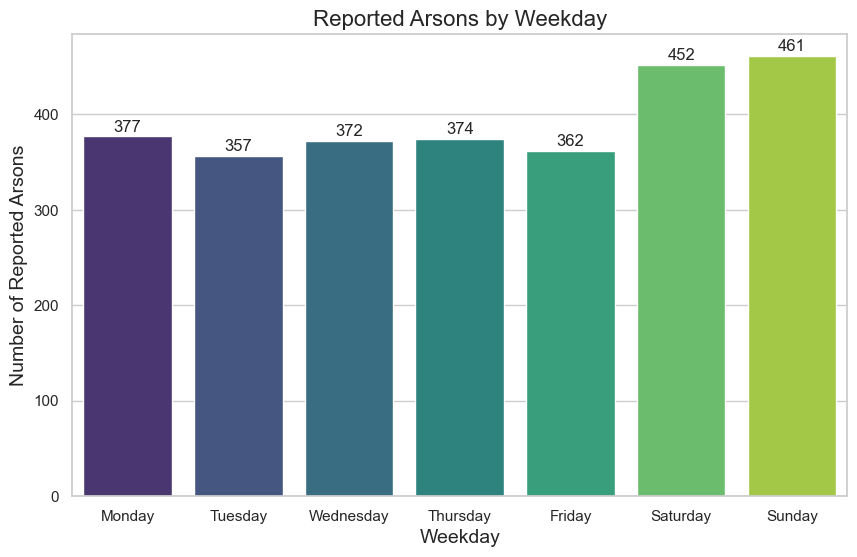

In [120]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
plot =sns.barplot(x='Weekday', y='reported_arsons', data=arsons_per_weekday_df, palette='viridis')

plt.title('Reported Arsons by Weekday', fontsize=16)
plt.xlabel('Weekday', fontsize=14)
plt.ylabel('Number of Reported Arsons', fontsize=14)

for p in plot.patches:
    height = p.get_height()
    plot.text(p.get_x() + p.get_width() / 2., height + 10, int(height), ha='center', va='center', fontsize=12)


plt.show()

sunday seems to be the day where there are the moste arsons reported, as seen above.


---  

As for where, Austin is the place with the most reported arsons (170 reports)

In [121]:
arson_per_com_area_series = arson_df.groupby('Community Area').size()
arson_per_com_area_df = arson_per_com_area_series.reset_index(name='reported_arsons')
arson_per_com_area_df.sort_values(by='reported_arsons',ascending=False,inplace=True)
arson_per_com_area_df.head().reset_index(drop=True)
arson_per_com_area_df['Community Area'] = arson_per_com_area_df['Community Area'].apply(area_num_to_name)

In [122]:
arson_per_com_area_df.reset_index(drop=True).head(1)

,Community Area,reported_arsons
0,Austin,170


**8.1** You just bought a new car. What weekday should you be most wary of as it has the highest risk for a Grand Theft Auto-style robbery (MOTOR VEHICLE THEFT)?

In [123]:
gta_filt = crime_chicago_2008_to_2012_df['Primary Type'] == 'MOTOR VEHICLE THEFT'
gta_df =crime_chicago_2008_to_2012_df[gta_filt]
weekdays = pd.DatetimeIndex(gta_df['Date']).weekday

gta_weekday_series = weekdays.value_counts()
gta_weekday_df = gta_weekday_series.reset_index(name='reported_gta')
gta_weekday_df.rename(columns={'Date':'Weekday'},inplace=True)
gta_weekday_df['Weekday'] = gta_weekday_df['Weekday'].apply(from_num_to_day)

In [124]:
gta_weekday_df

,Weekday,reported_gta
0,Friday,13622
1,Thursday,13058
2,Wednesday,13046
3,Monday,13027
4,Tuesday,12715
5,Saturday,12106
6,Sunday,11698


In [125]:
most_vs_second_most = round((((gta_weekday_df.iloc[0,1]/gta_weekday_df.iloc[1,1])-1)*100),1)

least_vs_most = round((((gta_weekday_df.iloc[-1,1]/gta_weekday_df.iloc[0,1])-1)*100),1)

The most_vs_second_most variable represents the diffrence bewteen the day with the most gta:s (Firday) compaired to the day with the second most gta:s per day (Thursday)

the least_vs_most variable represents the difference bewteen the day with the most gta:s (Firday) compaired to the day with the least gta:s per day (Sunday)

In [126]:
print(f' fridays sees {most_vs_second_most}% more reports than thursday which is the day with the second most gta reports\n',
f'sundays sees {least_vs_most}% less reports than fridays')

 fridays sees 4.3% more reports than thursday which is the day with the second most gta reports
 sundays sees -14.1% less reports than fridays


The df above represent the amount ouf reported gta:s per weekday sorted by the weekday with the largest amount of reported crimes.

Friday is the day where there are the most gta reports with around 4.3% more reports than the day with the second most reported gta (thursday)
Sundays are the weekday with the least amount of reported gta:s, there are 14.1% less reported gta:s on sundays than there are on fridays.


---  

**8.2** For that day, where (at what location) should you absolutely avoid leave your car carelessly? Where is it seemingly safest to do so?

In [127]:
gta_friday_filt = pd.DatetimeIndex(gta_df['Date']).weekday == 4
gta_friday_df = gta_df[gta_friday_filt]


gta_per_com_area_fridays_series = gta_friday_df.groupby('Community Area').size()

gta_per_com_area_fridays_df =gta_per_com_area_fridays_series.reset_index(name='reported_gta')

gta_per_com_area_fridays_df.sort_values(by='reported_gta',ascending=False,inplace=True)
gta_per_com_area_fridays_df['Community Area'] = gta_per_com_area_fridays_df['Community Area'].apply(area_num_to_name)

In [128]:
gta_per_com_area_fridays_df.head(1).reset_index(drop=True)

,Community Area,reported_gta
0,Austin,647


Again, austin is where there are the most reported gtas as shown above. Forest glen is the comunity area with the least gta reports wich is shown below.

In [129]:
gta_per_com_area_fridays_df.sort_values(by='reported_gta',ascending=True).head(1).reset_index(drop=True)

,Community Area,reported_gta
0,Forest Glen,14


**8.3*** Are there certain periods of the year/month/day/time of day where GTA is more frequent?

In [130]:
def crimes_per_month(year_list:list,with_total:bool=False)->pd.DataFrame:
    list_of_dfs = []
    for year in year_list:    
        year_gta_filt = (crime_chicago_2008_to_2012_df['Year'] == year) & gta_filt
        gta_for_the_year = crime_chicago_2008_to_2012_df[year_gta_filt]


        gta_per_month_series = pd.DatetimeIndex(gta_for_the_year['Date']).month.value_counts()
        gta_per_month_df = gta_per_month_series.reset_index(name=f'reporteted_gta_{year}')
        gta_per_month_df.rename(columns={'Date':'month'},inplace=True)

        list_of_dfs.append(gta_per_month_df)
    
    
    for df in list_of_dfs:
        df.set_index('month', inplace=True)

    gta_per_month_n_year_df = pd.concat(list_of_dfs, axis=1)
    gta_per_month_n_year_df.sort_values(by='month',inplace=True)
    gta_per_month_n_year_df.reset_index(inplace=True)
    gta_per_month_n_year_df['month'] = gta_per_month_n_year_df['month'].apply(num_to_month)
    
    if with_total:

        totals = gta_per_month_n_year_df.iloc[:, 1:].sum()
        total_row = pd.DataFrame(data=[['Total'] + totals.tolist()], columns=gta_per_month_n_year_df.columns)
        total_row['month'] = 'Total'

        final_df = pd.concat([total_row, gta_per_month_n_year_df], ignore_index=True)
        final_df['avrage_change_(%)'] = round(((1-(final_df['reporteted_gta_2009']/final_df['reporteted_gta_2008']))
                                                            +(1-(final_df['reporteted_gta_2010']/final_df['reporteted_gta_2009']))
                                                            +(1-(final_df['reporteted_gta_2011']/final_df['reporteted_gta_2010']))
                                                            +(1-(final_df['reporteted_gta_2012']/final_df['reporteted_gta_2011']))/5),2)

        return final_df
    else:
        return gta_per_month_n_year_df

In [131]:
year_list = [2008,2009,2010,2011,2012]

gta_per_month_08_to_12 = crimes_per_month(year_list)
gta_per_month_08_to_12_with_total = crimes_per_month(year_list,True)

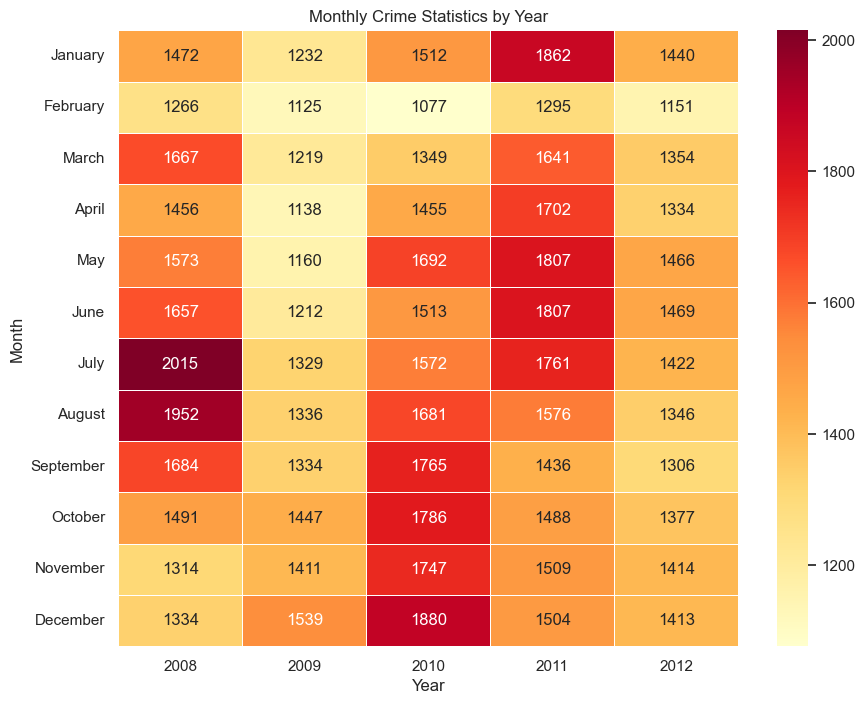

In [132]:
df = gta_per_month_08_to_12.set_index('month')

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(df, annot=True, fmt="d", cmap="YlOrRd", linewidths=.5)

plt.title('Monthly Crime Statistics by Year')
plt.xlabel('Year')
plt.ylabel('Month')
year_labels = [col[-4:] if isinstance(col, str) else str(col) for col in df.columns]
heatmap.set_xticklabels(year_labels, rotation=0)

plt.show()

the heatmap above shows which months for which year the reported crime rate was higher or lower than othes, this is shown by increesing redness for the months where the reported gta:s are higher


---  

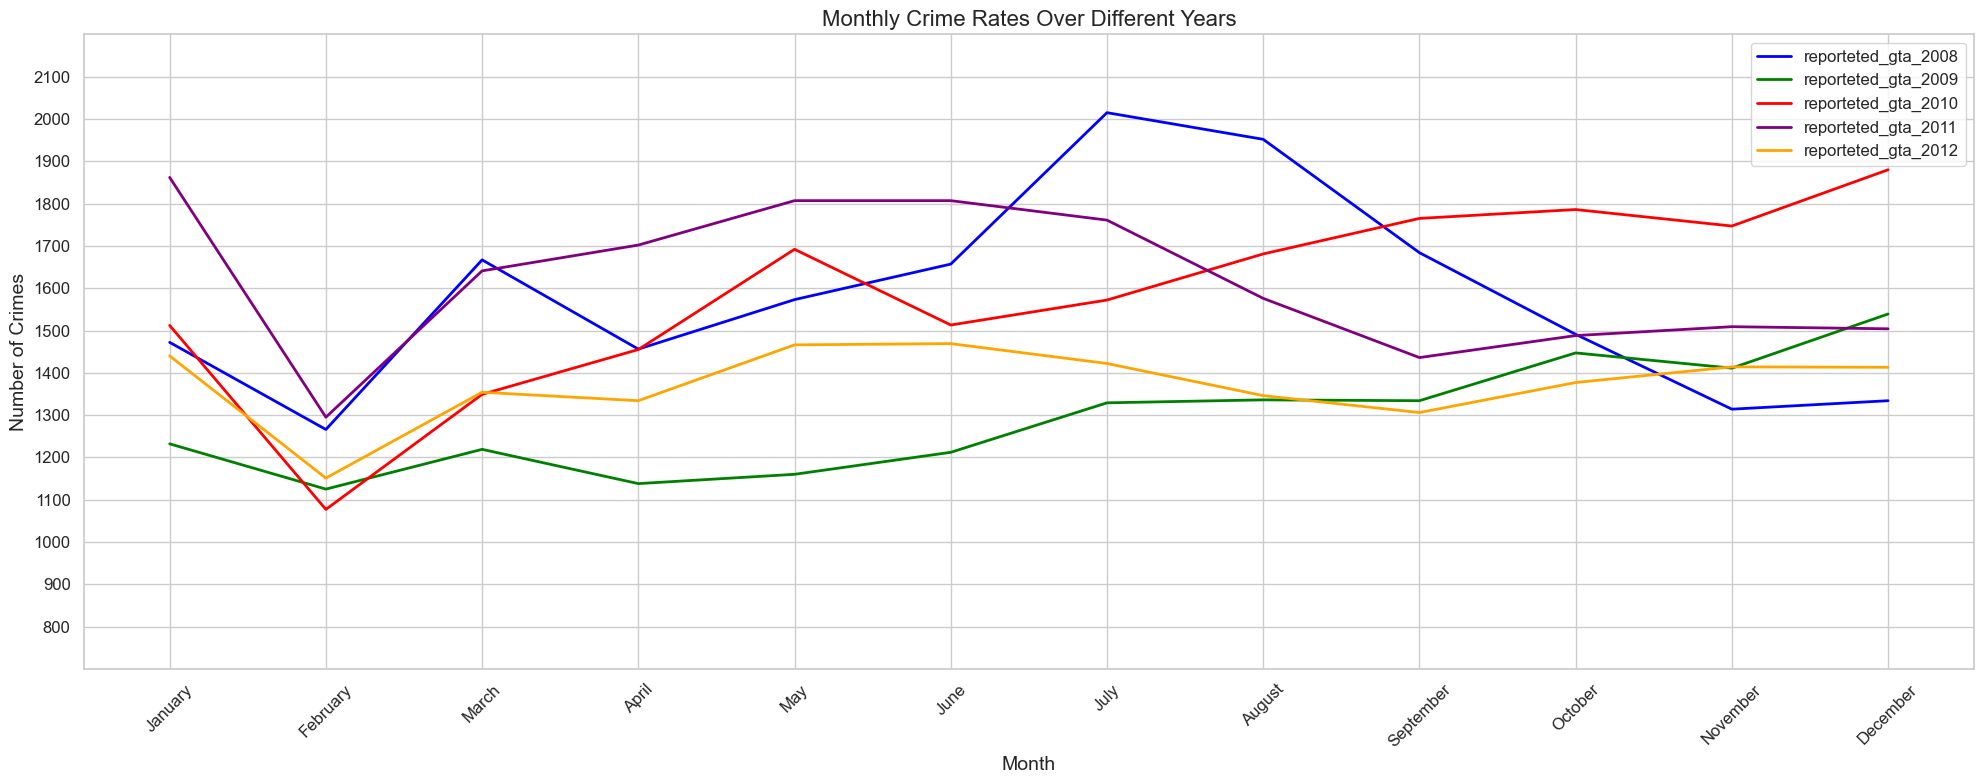

In [133]:
import numpy as np
sns.set(style="whitegrid")

plt.figure(figsize=(20, 8))

colors = ['blue', 'green', 'red', 'purple', 'orange']

for idx, column in enumerate(gta_per_month_08_to_12.columns[1:]):
    plt.plot(gta_per_month_08_to_12['month'], gta_per_month_08_to_12[column], label=column, linewidth=2, color=colors[idx % len(colors)])

plt.title('Monthly Crime Rates Over Different Years', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Crimes', fontsize=14)
plt.ylim([700, 2200])
plt.yticks(np.arange(800, 2101, 100), fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

by looking at the line plot above, one can assurt that reported gta rate decreeses in the month of February for every year between 2008 and 2012. the reported gta crime rate typicly increases durring spring time.

By looking at the dataframe bellow you can se on the avrage_change_(%) column that the avrage change thru the year for each specific month typicly decreases with the exception of july to september where tha avrage reported gta rate has increased slightly thru 2008 to 2012

In [134]:
gta_per_month_08_to_12_with_total

,month,reporteted_gta_2008,reporteted_gta_2009,reporteted_gta_2010,reporteted_gta_2011,reporteted_gta_2012,avrage_change_(%)
0,Total,18881,15482,19029,19388,16492,-0.04
1,January,1472,1232,1512,1862,1440,-0.25
2,February,1266,1125,1077,1295,1151,-0.03
3,March,1667,1219,1349,1641,1354,-0.02
4,April,1456,1138,1455,1702,1334,-0.19
5,May,1573,1160,1692,1807,1466,-0.23
6,June,1657,1212,1513,1807,1469,-0.14
7,July,2015,1329,1572,1761,1422,0.08
8,August,1952,1336,1681,1576,1346,0.15
9,September,1684,1334,1765,1436,1306,0.09


In [135]:
gta_night_n_day_08 = day_n_night_df_maker(2008,'MOTOR VEHICLE THEFT')
gta_night_n_day_09 = day_n_night_df_maker(2009,'MOTOR VEHICLE THEFT')
gta_night_n_day_10 = day_n_night_df_maker(2010,'MOTOR VEHICLE THEFT')
gta_night_n_day_11 = day_n_night_df_maker(2011,'MOTOR VEHICLE THEFT')
gta_night_n_day_12 = day_n_night_df_maker(2012,'MOTOR VEHICLE THEFT')

In [136]:
gta_night_n_day_08.rename(columns={'reported_crimes_2008_daytime':'gta_reports_2008_daytime','reported_crimes_2008_nighttime':'gta_reports_2008_nighttime'}, inplace=True)
gta_night_n_day_09.rename(columns={'reported_crimes_2009_daytime':'gta_reports_2009_daytime','reported_crimes_2009_nighttime':'gta_reports_2009_nighttime'}, inplace=True)
gta_night_n_day_10.rename(columns={'reported_crimes_2010_daytime':'gta_reports_2010_daytime','reported_crimes_2010_nighttime':'gta_reports_2010_nighttime'}, inplace=True)
gta_night_n_day_11.rename(columns={'reported_crimes_2011_daytime':'gta_reports_2011_daytime','reported_crimes_2011_nighttime':'gta_reports_2011_nighttime'}, inplace=True)
gta_night_n_day_09.rename(columns={'reported_crimes_2012_daytime':'gta_reports_2012_daytime','reported_crimes_2012_nighttime':'gta_reports_2012_nighttime'}, inplace=True)

---  
As for the reported gta rate per weekday, you can see in the subplot below crimes are generally reported more often durring daytime up untill saturday and sunday where there are more nighttime reports for all the years between, and including 2008-2012

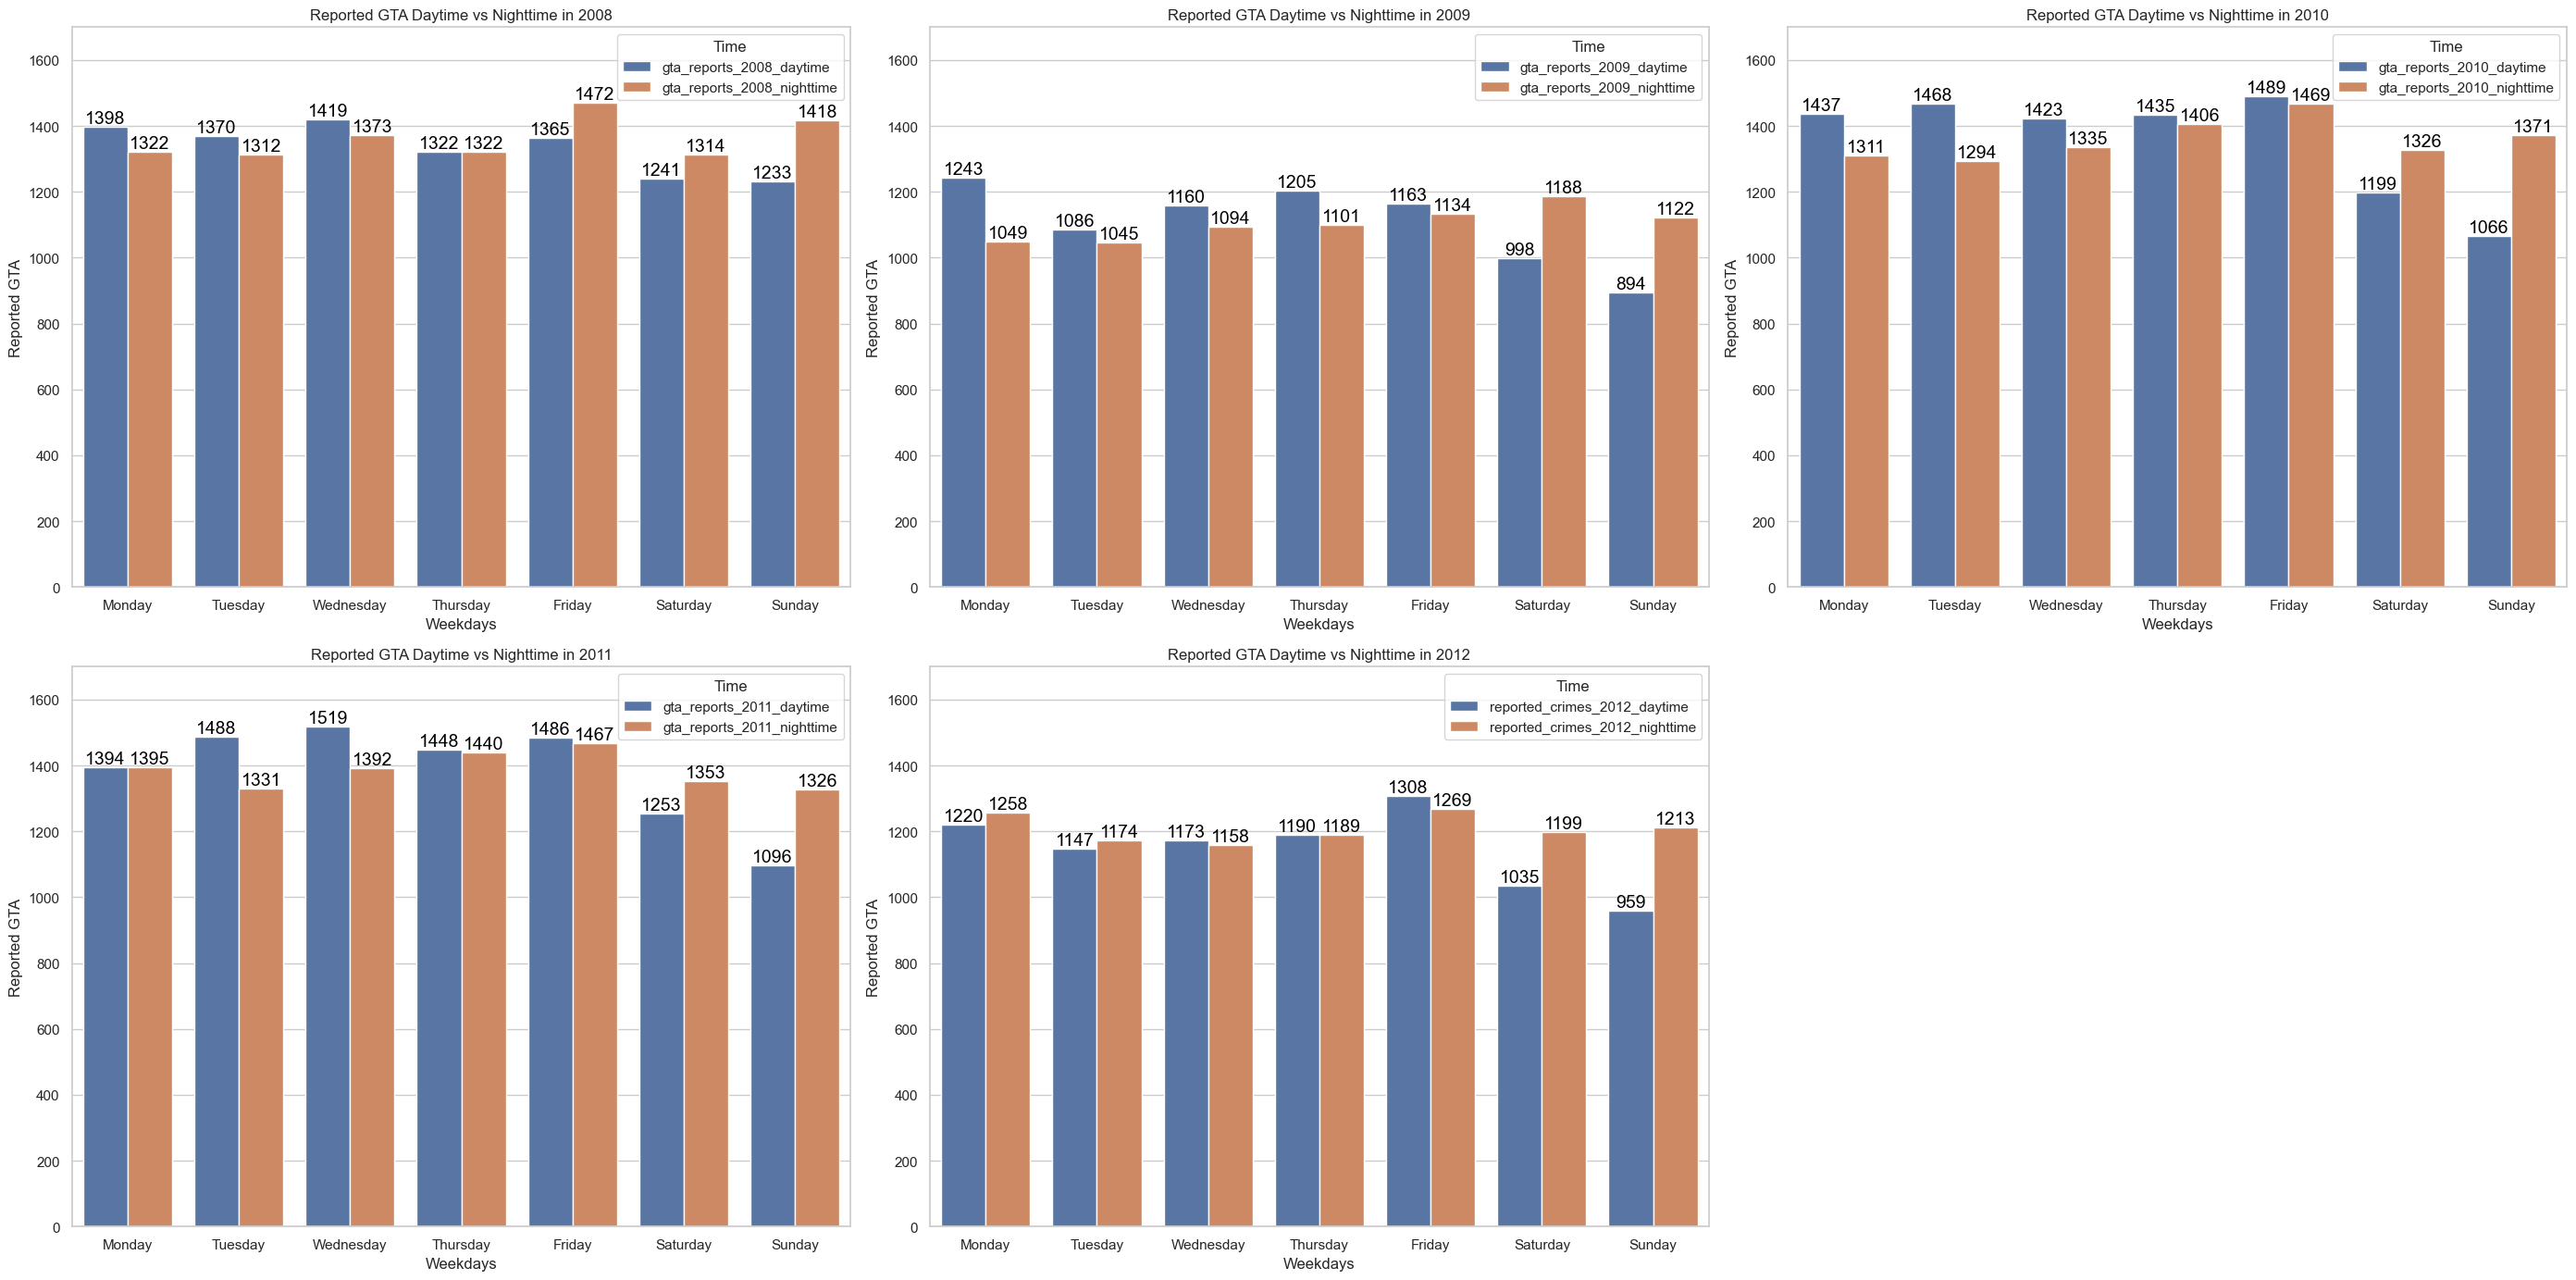

In [137]:
fig, axes = plt.subplots(2, 3, figsize=(28, 14))
axes = axes.flatten()

dfs = [gta_night_n_day_08, gta_night_n_day_09, gta_night_n_day_10, gta_night_n_day_11, gta_night_n_day_12]
titles = ['2008', '2009', '2010', '2011', '2012']

for i, df in enumerate(dfs):
    df_melted = df.melt(id_vars=[df.columns[0]], var_name='Time', value_name='Reported GTA')
    
    sns.barplot(data=df_melted, x=df.columns[0], y='Reported GTA', hue='Time', ax=axes[i])
    axes[i].set_title(f"Reported GTA Daytime vs Nighttime in {titles[i]}")
    axes[i].set_xlabel('Weekdays')
    axes[i].set_ylabel('Reported GTA')
    axes[i].set_ylim(0, 1700)

    for p in axes[i].patches:
        axes[i].text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()),
                     fontsize=14, color='black', ha='center', va='bottom')
        
axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

by looking at the subplot above one can see that for the most part gta crimes are reported durring day time except for weekends where there are more gta reports durring night time

**9.1** Are there any (geographical) areas hit particularly hard by prostitution on friday nights?

In [138]:
night_filt = (pd.DatetimeIndex(crime_chicago_2008_to_2012_df['Date']).hour >= 19) | (pd.DatetimeIndex(crime_chicago_2008_to_2012_df['Date']).hour <= 5)
prostitution_filt_friday_night = (crime_chicago_2008_to_2012_df['Primary Type'] == 'PROSTITUTION') & (pd.DatetimeIndex(crime_chicago_2008_to_2012_df['Date']).weekday == 4) & (night_filt)

prostitution_df = crime_chicago_2008_to_2012_df[prostitution_filt_friday_night]

prostitution_locations_series = prostitution_df.groupby('Community Area').size()
prostitution_locations_df = prostitution_locations_series.reset_index(name='reported_prostitution')

prostitution_locations_df.sort_values(by='reported_prostitution',ascending=False,inplace=True)
prostitution_locations_df['Community Area'] = prostitution_locations_df['Community Area'].apply(area_num_to_name)

prostitution_locations_df.head(1).reset_index(drop=True)


,Community Area,reported_prostitution
0,Austin,194


Austin is again the community area where there is the mosterepored crimes, this time prostitution reports.


---  

**9.2*** Can you vizualise the locations from 9.1 on a map of Chicago? Is there a concentration somewhere? 

In [139]:
chicago_lat = 41.8781
chicago_lon = -87.6298
px.density_mapbox(prostitution_df,
                  lat='Latitude',
                  lon='Longitude',
                  radius=3,
                  opacity=0.8,
                  color_continuous_scale='Viridis',
                  center={'lat': chicago_lat, 'lon':chicago_lon},
                  zoom=8.7,
                  mapbox_style= 'open-street-map'
                  )

by looking att the map above you can see where there have been reported prostiturions. One think to keep in mind is that these are only reported prostitutions and so it does not necesseraly mean that thats where there are the most prostituion going on. there is a big cluster of reported prostitutuins on the northside of chicago city, by the water, which i presume is because there is a univerity there and the university officials probably report prostitution meroe frequently to "protect" the students who go to this univeristy.



---  

**10.1** Merge the crime and census datasets together in a suitable way.

In [140]:
crime_census_merged_df = pd.merge(crime_chicago_2008_to_2012_df,chicago_census_2008_to_2012_df, left_on="Community Area", right_on="Community Area Number")

i choose to merge using pd.mergen and merging on the "Community Area" from the crime data and "Community Area Number" from the cencus data. this because those are the common column that apears in both datasets.


---  

In [141]:
crime_census_merged_df['Community Area Number'] = crime_census_merged_df['Community Area Number'].fillna(0.0)

i choose to fill the NaN values, that came from the Community Area Number, with 0.0wich was what those values where in teh crime dataset befor the merge.


---  

In [142]:
test = crime_census_merged_df.groupby(['COMMUNITY AREA NAME',
        'PERCENT HOUSEHOLDS BELOW POVERTY',
       'PERCENT AGED 16+ UNEMPLOYED',
        'PER CAPITA INCOME '
       ])['Primary Type'].value_counts()

test_df = test.reset_index(name='times_reported')
test_df.sort_values(by='times_reported')

,COMMUNITY AREA NAME,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PER CAPITA INCOME,Primary Type,times_reported
555,East Garfield Park,42.4,19.6,12961,OBSCENITY,1
762,Garfield Ridge,8.8,11.3,26353,CRIMINAL SEXUAL ASSAULT,1
763,Garfield Ridge,8.8,11.3,26353,OBSCENITY,1
1313,Near North Side,12.9,7.0,88669,HUMAN TRAFFICKING,1
395,Calumet Heights,11.5,20.0,28887,PROSTITUTION,1
...,...,...,...,...,...,...
2047,West Town,14.7,6.6,43198,THEFT,18387
1123,Loop,14.7,5.7,65526,THEFT,20901
138,Austin,28.6,22.6,15957,BATTERY,22794
1283,Near North Side,12.9,7.0,88669,THEFT,26399


There are obviously so much more to gain by analysing these datasets. This is now your opportunity to dwelve deeper into what you yourself like. Recall that the census data contributed with **alot** of dimensions.

    Instructions: think of one or several questions (as we've done above). Then, proceed with your own deep dive analysis and provide your answers.

In [143]:
crimes_per_com_area_series = crime_census_merged_df.groupby(['COMMUNITY AREA NAME',
       'PERCENT OF HOUSING CROWDED', 'PERCENT HOUSEHOLDS BELOW POVERTY',
       'PERCENT AGED 16+ UNEMPLOYED',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ',
       'HARDSHIP INDEX']).size()

crimes_per_com_area_df = crimes_per_com_area_series.reset_index(name='REPORTED_CRIMES')
numeric_columns = ['REPORTED_CRIMES',
       'PERCENT OF HOUSING CROWDED', 'PERCENT HOUSEHOLDS BELOW POVERTY',
       'PERCENT AGED 16+ UNEMPLOYED',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ',
       'HARDSHIP INDEX']
cencus_correlation = round(crimes_per_com_area_df[numeric_columns].corr(),2)


cencus_correlation[['REPORTED_CRIMES']]

,REPORTED_CRIMES
REPORTED_CRIMES,1.00
PERCENT OF HOUSING CROWDED,0.14
PERCENT HOUSEHOLDS BELOW POVERTY,0.30
PERCENT AGED 16+ UNEMPLOYED,0.25
PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,0.06
PERCENT AGED UNDER 18 OR OVER 64,-0.12
PER CAPITA INCOME,-0.01
HARDSHIP INDEX,0.20


As seen above, there is a positive correlation between crime rates and the percentage of households below poverty (0.30), PERCENT OF HOUSING CROWDED (0.14) and HARDSHIP INDEX	(0.20) as well as the percentage of unemployed aged 16+ (0.25). This suggests that higher poverty and unemployment rates are associated with higher crime rates.
Interestingly, the correlation between crime rates and per capita income is very low (−0.010) and PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA (0.06) indicating no clear relationship.

This correlation is displayed in a heatmap bellow

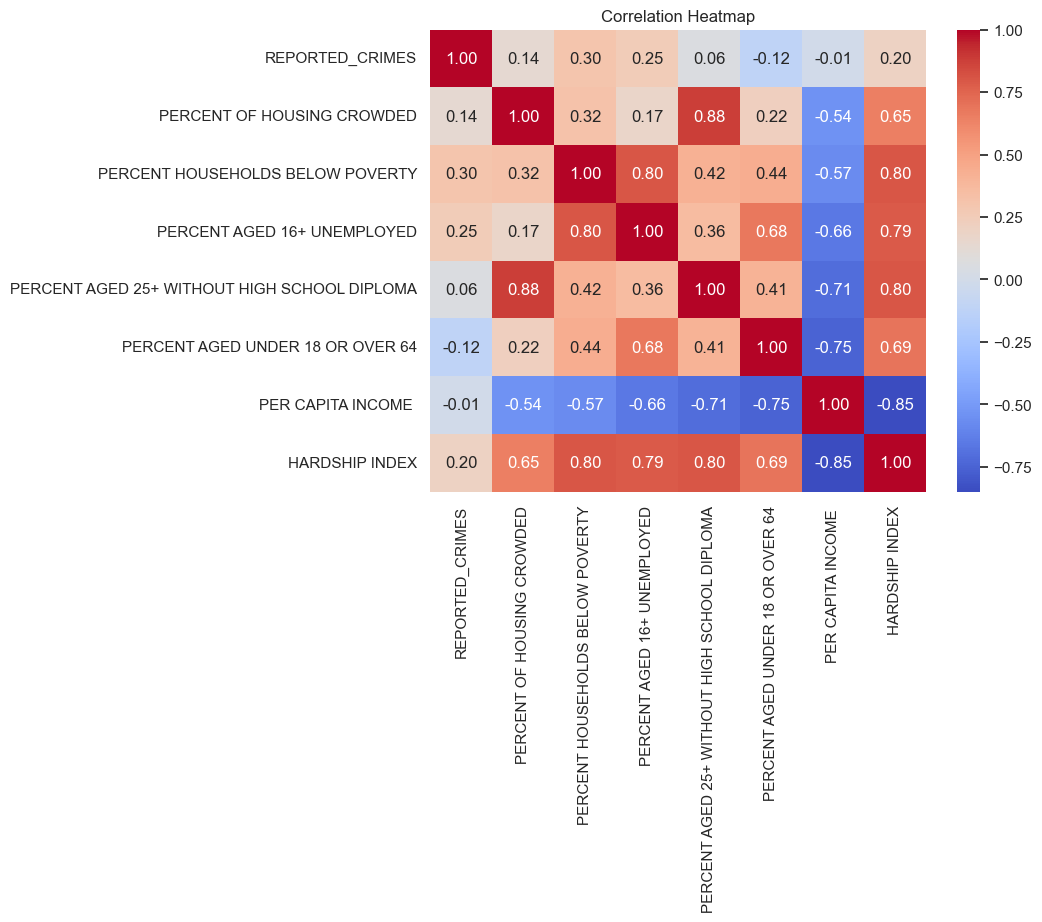

In [144]:
plt.figure(figsize=(8, 6))
sns.heatmap(cencus_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

plt.show()


And bellow we try to visualize the correaltion of the 3 socioeconomic factors with the highest corellation in a scatterplot

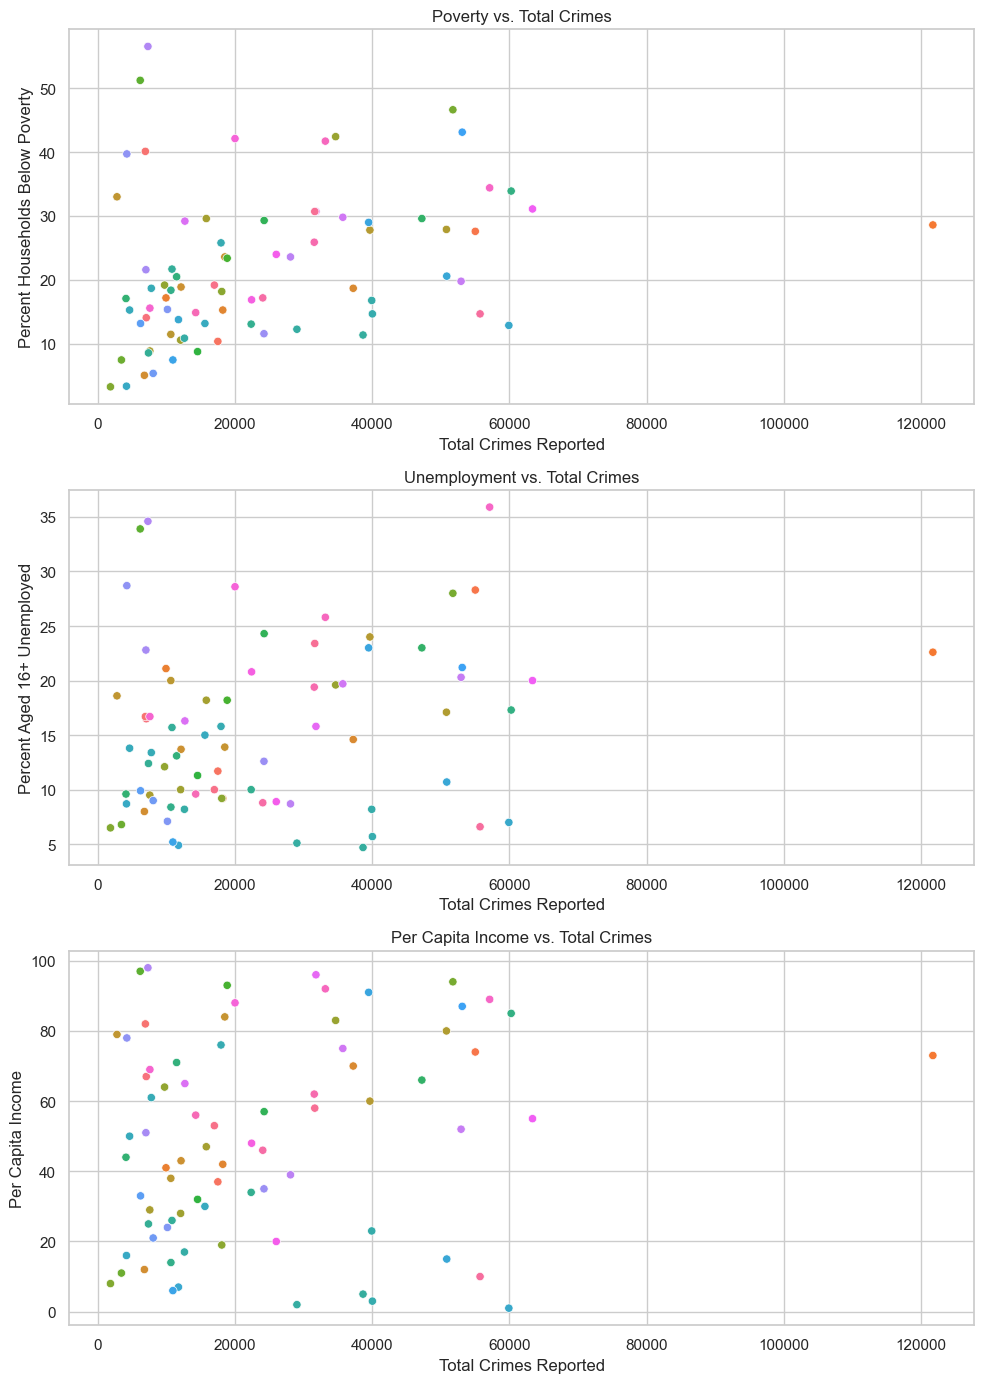

In [145]:
plt.figure(figsize=(10, 14))

# Scatter plot for Percent Households Below Poverty vs. Total Crimes
plt.subplot(3, 1, 1)
sns.scatterplot(data=crimes_per_com_area_df, y='PERCENT HOUSEHOLDS BELOW POVERTY', x='REPORTED_CRIMES', hue='COMMUNITY AREA NAME',legend=False)
plt.title('Poverty vs. Total Crimes')
plt.ylabel('Percent Households Below Poverty')
plt.xlabel('Total Crimes Reported')

# Scatter plot for Percent Aged 16+ Unemployed vs. Total Crimes
plt.subplot(3, 1, 2)
sns.scatterplot(data=crimes_per_com_area_df, y='PERCENT AGED 16+ UNEMPLOYED', x='REPORTED_CRIMES', hue='COMMUNITY AREA NAME',legend=False)
plt.title('Unemployment vs. Total Crimes')
plt.ylabel('Percent Aged 16+ Unemployed')
plt.xlabel('Total Crimes Reported')

# Scatter plot for hardship vs. Total Crimes
plt.subplot(3, 1, 3)
sns.scatterplot(data=crimes_per_com_area_df, y='HARDSHIP INDEX', x='REPORTED_CRIMES', hue='COMMUNITY AREA NAME',legend=False)
plt.title('Per Capita Income vs. Total Crimes')
plt.ylabel('Per Capita Income')
plt.xlabel('Total Crimes Reported')


plt.tight_layout()
plt.show()

---  


bellow we take a look att the community area with the most reported crimes (Austin) and compair socioeconomic factors to see if there is anything with Austins socioeconomics that explains its extream level of crime reports

In [146]:
crimes_per_com_area_df.sort_values(by='COMMUNITY AREA NAME',inplace=True)
austin_cencus = crimes_per_com_area_df.iloc[5,:]

In [147]:
average_values = round(crimes_per_com_area_df[[
       'PERCENT OF HOUSING CROWDED',
       'PERCENT HOUSEHOLDS BELOW POVERTY',
       'PERCENT AGED 16+ UNEMPLOYED',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'PERCENT AGED UNDER 18 OR OVER 64',
       'PER CAPITA INCOME ',
       'HARDSHIP INDEX',
       'REPORTED_CRIMES']].mean(),2)
average_df = average_values.reset_index()
average_df.columns = ['Column', 'Average']

max_values = crimes_per_com_area_df[[
       'PERCENT OF HOUSING CROWDED', 'PERCENT HOUSEHOLDS BELOW POVERTY',
       'PERCENT AGED 16+ UNEMPLOYED',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ',
       'HARDSHIP INDEX', 'REPORTED_CRIMES']].max()
max_df = max_values.reset_index()
max_df.columns = ['Column', 'max']

min_values = crimes_per_com_area_df[[
       'PERCENT OF HOUSING CROWDED', 'PERCENT HOUSEHOLDS BELOW POVERTY',
       'PERCENT AGED 16+ UNEMPLOYED',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ',
       'HARDSHIP INDEX', 'REPORTED_CRIMES']].min()
min_df = min_values.reset_index()
min_df.columns = ['Column', 'Average']

min_max_avr_vs_austin_df = pd.concat([average_values, max_values,min_values,austin_cencus],axis=1)
min_max_avr_vs_austin_df.rename(columns={0:'Avrage',1:'Max',2:'Min',5:'Austin'},inplace=True)

min_max_avr_vs_austin_df = min_max_avr_vs_austin_df.dropna()
min_max_avr_vs_austin_df

,Avrage,Max,Min,Austin
PERCENT OF HOUSING CROWDED,4.92,15.8,0.3,6.3
PERCENT HOUSEHOLDS BELOW POVERTY,21.77,56.5,3.3,28.6
PERCENT AGED 16+ UNEMPLOYED,15.37,35.9,4.7,22.6
PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,20.34,54.8,2.5,24.4
PERCENT AGED UNDER 18 OR OVER 64,35.75,51.5,13.5,37.9
PER CAPITA INCOME,25563.17,88669.0,8201.0,15957
HARDSHIP INDEX,49.51,98.0,1.0,73.0
REPORTED_CRIMES,24389.30,121733.0,1858.0,121733


We can see that austins household below poverty precentage is not that much more than the avrage and far from the worst in chicago. the unemployment is quite a bite larger in Austin then what the avrage unemployment is in chicago and the incom per capita is 37,6% lower than avrage but almost dubble than the min incom per capita in chicago. none of these numbers help explain why there are almost five times more reported crimes in Austin then the avrage in chicago in the period between 2008 and 2012

---  

In [148]:
px.scatter(crimes_per_com_area_df,
           y='PERCENT AGED 16+ UNEMPLOYED',
           size= 'PER CAPITA INCOME ',
           color='COMMUNITY AREA NAME',
           x='REPORTED_CRIMES',
           hover_data= ['COMMUNITY AREA NAME', 'PERCENT HOUSEHOLDS BELOW POVERTY',
       'PERCENT AGED 16+ UNEMPLOYED', 'PER CAPITA INCOME ', 'REPORTED_CRIMES'])

In creating the sctterplot above i hoped to find a relation between unemployment rate and reported crimes but as seen above, Fuller Park and Riverdale (top left of the plot) both have very low income and verry high unemployment yet Near North Side (bottom middle) has more than 4.5 times more reported crimes than Fuller Park and Riverdale combined, while also being the community area with the most income per capita and one fo the lowest unemployment



---  

# 12 - A moment of reflection

It is a bit sad to see how much crime there is in chicago especially crimes involving children.
One thing that i am glad to see is that, atleast in the time frame between 2008-2012, most crimes seems to decreas and thos that increas are not increasing that much. It was interesting to see that there was more crimes reported during daytime then nighttime, this is something that i would not have quest beforehand. 

One thing to keep in mind is that the conclusions drawn are only as good and reliable as the data availible and so im sure that there could be more insight to for example the reason to Austins high crime rate if there where more data availible. there where quite a few columns that i did not factor in whan analysing the data and im sure there is some conclusions that could have been drawn from them. Some conclusions like the one from the bottom om 5.6 can not be taken as fact for reasons i explain in a markdown under that question. one must assume that there are faulty and or incompleat data where the input has been a default value like in the instance of the 5.6 where i made the assumption that the default time input is 00.00 when reporting a crime where the specifik time of the crime is missing.

Another assumption that i could have made but choose not to due to lack of evidance supporting data was in the 8.3 where i made a heatmap where you can see that the reported crime rate decreased drasticly on november 2008 , which was the election year where Obama was elected. the crime rate seemed to either maintain at the same level or decrees for the next few months after that election and then ramp up drasticly about a year after and even more so the year after that. Obama ran on - amoung other things- that he would help the lower class people and areas that are more prone to crime and poverty. The sentiment in chicago after Obamas election might have gotten better as hope arose amongst the people but a year or so after the election, when peaple started noticing that there came little help for those people who had high hopes of change, people took their frustration back to the streets. this is just a assumption with lacking evidence and thats again why i choose to leave it out of the markdown under the heatmap.

Other analyses can be seen as reliable given that the data is accurate, but again deeper analyses could have been made if given more data especially in te cencus dataset, things like dominant ethicity or ethincity split (albeit perhaps not the most ethical data to collect) or amount of police per capita, capita per km/sqr and other information like that could possible have given furhter insigth to the relation between community area and crime rate.

I was sad to see that there was not a great correaltion between crime rate and any of the census data. For instance i was surprised to se such a low correlation between incom per capita and reported crime rate, going in to this assignment i would have comfortably assumed that the correlation between incom and crime rate would be much higher. Perhaps if there where any strong correlations i could have found the/a reason for austins extream reported crime rate but there was no success on that front.

This assigment has been very thought provocing and has helped me develop my skills in data analyses and data science. I deffenitly feel like i have a better understanding of pandas and the methods that come with it and for that i would like to thank you :)